<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Northeastern University</div>
<div style="text-align: right">Dino Konstantopoulos, 2 March 2020</div>

This notebook is dedicated to Li Wenliang, "*a healthy society should have more than one voice*".

<br />
<center>
<img src="https://www.paho.org/hq/images/stories/2020/coronavirus-6-1400x592.jpg" width=600 />
</center>

We evaluate a possible range for the infectivity, or $R_0$, of the Coronavirus Covid19. Specifically, we focus on how to extrapolate existing data from China in order to get a complete dataset that we can use for estimation.

We need to keep in mind that $R_0$ is not an absolute metric, it is one based on the virus as much as the society it infects. So different countries may experience distinct $R_0$s for the same epidemic. This notebook is a framework for estimating $R_0$ from data.

# Data from China

This [website](https://github.com/BlankerL/DXY-COVID-19-Data) is a result of good citizenship: People posting real data that can help other people do science, learn from mistakes, and fare better.

Let's download this data, import `DXYArea.csv` as a pandas dataframe, and plot some interesting plots.

In [1]:
import numpy as np
import pandas as pd
covid19_china = pd.read_csv('data/DXYArea.csv')
covid19_china.head(50)

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount,updateTime
0,辽宁省,Liaoning,210000,丹东,Dandong,210600.0,125,0,113,1,11,0,7,0,2020-03-14 08:09:12.403
1,辽宁省,Liaoning,210000,沈阳,Shenyang,210100.0,125,0,113,1,28,0,26,0,2020-03-14 08:09:12.403
2,辽宁省,Liaoning,210000,大连,Dalian,210200.0,125,0,113,1,19,0,17,0,2020-03-14 08:09:12.403
3,辽宁省,Liaoning,210000,葫芦岛,Huludao,211400.0,125,0,113,1,12,0,9,1,2020-03-14 08:09:12.403
4,辽宁省,Liaoning,210000,朝阳,Chaoyang,211300.0,125,0,113,1,6,0,5,0,2020-03-14 08:09:12.403
5,辽宁省,Liaoning,210000,锦州,Jinzhou,210700.0,125,0,113,1,12,0,12,0,2020-03-14 08:09:12.403
6,辽宁省,Liaoning,210000,盘锦,Panjin,211100.0,125,0,113,1,11,0,11,0,2020-03-14 08:09:12.403
7,辽宁省,Liaoning,210000,阜新,Fuxin,210900.0,125,0,113,1,8,0,8,0,2020-03-14 08:09:12.403
8,辽宁省,Liaoning,210000,铁岭,Tieling,211200.0,125,0,113,1,7,0,7,0,2020-03-14 08:09:12.403
9,辽宁省,Liaoning,210000,鞍山,Anshan,210300.0,125,0,113,1,4,0,4,0,2020-03-14 08:09:12.403


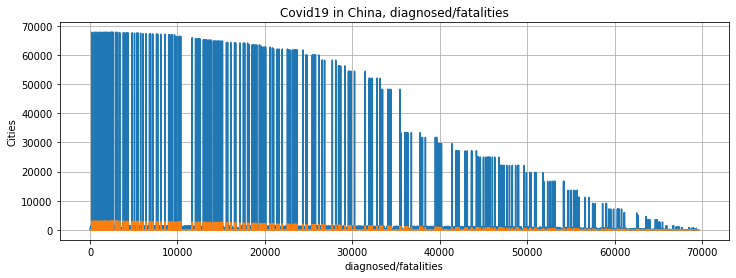

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12, 4))

plt.plot(covid19_china.province_confirmedCount)
plt.plot(covid19_china.province_deadCount)

plt.title('Covid19 in China, diagnosed/fatalities')
plt.ylabel('Cities')
plt.xlabel('diagnosed/fatalities')
plt.grid(True)

It looks like the data is sorted by hardest hit cities.

This is just the fatalities:

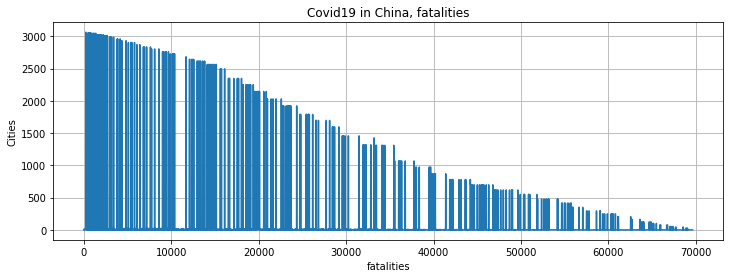

In [42]:
plt.figure(figsize=(12, 4))

plt.plot(covid19_china.province_deadCount)

plt.title('Covid19 in China, fatalities')
plt.ylabel('Cities')
plt.xlabel('fatalities')
plt.grid(True)

Let's drop some columns:

In [3]:
drop_cols = ['province_suspectedCount', 'city_suspectedCount', 'province_zipCode', 'city_zipCode']

covid19_china.drop(drop_cols, axis=1, inplace=True)
covid19_china.head()

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount,updateTime
0,辽宁省,Liaoning,丹东,Dandong,125,113,1,11,7,0,2020-03-14 08:09:12.403
1,辽宁省,Liaoning,沈阳,Shenyang,125,113,1,28,26,0,2020-03-14 08:09:12.403
2,辽宁省,Liaoning,大连,Dalian,125,113,1,19,17,0,2020-03-14 08:09:12.403
3,辽宁省,Liaoning,葫芦岛,Huludao,125,113,1,12,9,1,2020-03-14 08:09:12.403
4,辽宁省,Liaoning,朝阳,Chaoyang,125,113,1,6,5,0,2020-03-14 08:09:12.403


Original number of rows:

In [4]:
len(covid19_china)

69635

Let's drop the N/As:

In [5]:
covid19_china.dropna(inplace=True)

New number of rows:

In [6]:
len(covid19_china)

67997

This column looks like a good candidate for an index:

In [26]:
set(covid19_china.updateTime.values)

{'2020-02-08 12:00:32.912',
 '2020-02-12 09:33:11.975',
 '2020-02-07 15:27:38.565',
 '2020-02-10 09:38:47.820',
 '2020-02-15 15:38:43.493',
 '2020-02-18 17:37:59.292',
 '2020-02-08 20:44:39.842',
 '2020-02-15 11:50:01.777',
 '2020-02-11 15:24:24.035',
 '2020-02-03 21:27:58.202',
 '2020-01-25 11:06:28.924',
 '2020-02-05 10:09:54.167',
 '2020-01-28 15:50:34.892',
 '2020-02-13 08:53:10.157',
 '2020-02-19 17:33:34.704',
 '2020-01-26 19:58:39.132',
 '2020-02-08 19:15:23.007',
 '2020-01-27 09:42:20.485',
 '2020-01-31 00:21:21.496',
 '2020-02-16 15:24:54.702',
 '2020-02-01 11:12:59.166',
 '2020-01-26 20:00:40.445',
 '2020-02-20 20:15:38.155',
 '2020-02-08 13:43:54.698',
 '2020-03-09 22:18:06.071',
 '2020-01-26 16:50:30.404',
 '2020-02-03 18:58:58.481',
 '2020-02-28 12:33:48.698',
 '2020-02-21 07:59:23.823',
 '2020-02-18 18:13:58.462',
 '2020-01-29 09:23:33.775',
 '2020-02-15 09:36:03.078',
 '2020-02-05 09:52:09.789',
 '2020-02-08 19:14:22.015',
 '2020-02-22 15:07:00.315',
 '2020-01-24 17:30:0

In [14]:
covid19_china.cityEnglishName.values

array(['Dandong', 'Shenyang', 'Dalian', ..., 'Changchun', 'Shijiazhuang',
       'Yinchuan'], dtype=object)

### Wuhan

How many rows refer to `Wuhan`, the epicenter of the pandemic?

In [30]:
list(covid19_china.cityEnglishName.values).count('Wuhan')

360

Let's get these rows:

In [7]:
covid19_wuhan = covid19_china[covid19_china['cityEnglishName']=='Wuhan']
covid19_wuhan

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount,updateTime
206,湖北省,Hubei,武汉,Wuhan,67786,51553,3062,49991,35197,2436,2020-03-13 11:08:59.974
474,湖北省,Hubei,武汉,Wuhan,67781,50318,3056,49986,34096,2430,2020-03-12 17:33:24.482
600,湖北省,Hubei,武汉,Wuhan,67781,50316,3056,49986,34094,2430,2020-03-12 14:27:43.370
775,湖北省,Hubei,武汉,Wuhan,67781,50298,3056,49986,34094,2430,2020-03-12 09:21:37.890
1035,湖北省,Hubei,武汉,Wuhan,67773,49134,3046,49978,33117,2423,2020-03-11 18:49:50.822
...,...,...,...,...,...,...,...,...,...,...,...
69075,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 11:49:48.584
69331,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 09:50:40.357
69339,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 09:49:39.772
69345,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 09:48:39.253


Let's sort chronologically:

In [8]:
covid19_wuhan2 = covid19_wuhan.sort_values(by=['updateTime'])
covid19_wuhan2.head(30)

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount,updateTime
69349,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 09:47:38.698
69345,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 09:48:39.253
69339,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 09:49:39.772
69331,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 09:50:40.357
69075,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 11:49:48.584
69052,湖北省,Hubei,武汉,Wuhan,549,28,0,495,0,0,2020-01-24 12:23:06.852
69044,湖北省,Hubei,武汉,Wuhan,549,28,24,495,0,0,2020-01-24 12:24:07.515
68992,湖北省,Hubei,武汉,Wuhan,549,31,24,495,0,0,2020-01-24 12:51:13.280
68979,湖北省,Hubei,武汉,Wuhan,549,31,24,495,28,0,2020-01-24 13:15:28.296
68971,湖北省,Hubei,武汉,Wuhan,549,31,24,495,28,0,2020-01-24 13:16:28.914


Let's set the index:

In [30]:
covid19_wuhan3 = covid19_wuhan2.set_index('updateTime')
covid19_wuhan3

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,
2020-01-24 09:47:38.698,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:48:39.253,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:49:39.772,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:50:40.357,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 11:49:48.584,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:50.822,湖北省,Hubei,武汉,Wuhan,67773,49134,3046,49978,33117,2423
2020-03-12 09:21:37.890,湖北省,Hubei,武汉,Wuhan,67781,50298,3056,49986,34094,2430
2020-03-12 14:27:43.370,湖北省,Hubei,武汉,Wuhan,67781,50316,3056,49986,34094,2430


Let's plot diagnosed, cured, and fatalities for Wuhan, chronologically:

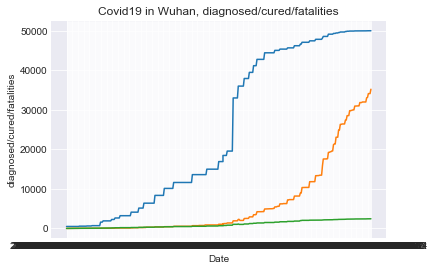

In [31]:
plt.plot(covid19_wuhan3.city_confirmedCount)
plt.plot(covid19_wuhan3.city_curedCount)
plt.plot(covid19_wuhan3.city_deadCount)

plt.title('Covid19 in Wuhan, diagnosed/cured/fatalities')
plt.ylabel('diagnosed/cured/fatalities')
plt.xlabel('Date')
plt.grid(True)

How about the entire province of `Hubei`, whose capital is `Wuhan`?

### Hubei

In [48]:
covid19_Hubei = covid19_china[covid19_china['provinceEnglishName']=='Hubei']
covid19_Hubei

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount,updateTime
206,湖北省,Hubei,武汉,Wuhan,67786,51553,3062,49991,35197,2436,2020-03-13 11:08:59.974
207,湖北省,Hubei,孝感,Xiaogan,67786,51553,3062,3518,3204,126,2020-03-13 11:08:59.974
208,湖北省,Hubei,鄂州,Ezhou,67786,51553,3062,1394,1184,55,2020-03-13 11:08:59.974
209,湖北省,Hubei,随州,Suizhou,67786,51553,3062,1307,1181,45,2020-03-13 11:08:59.974
210,湖北省,Hubei,荆州,Jingzhou,67786,51553,3062,1580,1464,49,2020-03-13 11:08:59.974
...,...,...,...,...,...,...,...,...,...,...,...
69346,湖北省,Hubei,孝感,Xiaogan,549,0,0,22,0,0,2020-01-24 09:48:39.253
69347,湖北省,Hubei,黄冈,Huanggang,549,0,0,12,0,0,2020-01-24 09:48:39.253
69348,湖北省,Hubei,荆州,Jingzhou,549,0,0,8,0,0,2020-01-24 09:48:39.253
69349,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0,2020-01-24 09:47:38.698


In [54]:
covid19_Hubei2 = covid19_Hubei.drop_duplicates(subset=['updateTime'])
covid19_Hubei3 = covid19_Hubei2.sort_values(by=['updateTime'])
covid19_Hubei4 = covid19_Hubei3.set_index('updateTime')
covid19_Hubei4

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,
2020-01-24 09:47:38.698,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:48:39.253,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:49:39.772,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:50:40.357,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 11:49:48.584,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:50.822,湖北省,Hubei,武汉,Wuhan,67773,49134,3046,49978,33117,2423
2020-03-12 09:21:37.890,湖北省,Hubei,武汉,Wuhan,67781,50298,3056,49986,34094,2430
2020-03-12 14:27:43.370,湖北省,Hubei,武汉,Wuhan,67781,50316,3056,49986,34094,2430


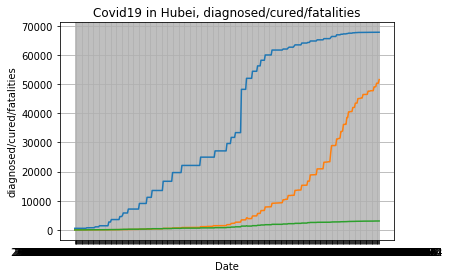

In [56]:
plt.plot(covid19_Hubei4.province_confirmedCount)
plt.plot(covid19_Hubei4.province_curedCount)
plt.plot(covid19_Hubei4.province_deadCount)

plt.title('Covid19 in Hubei, diagnosed/cured/fatalities')
plt.ylabel('diagnosed/cured/fatalities')
plt.xlabel('Date')
plt.grid(True)

### Shanghai

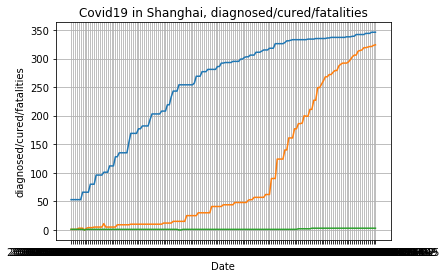

In [60]:
covid19_shanghai = covid19_china[covid19_china['provinceEnglishName']=='Shanghai']
covid19_shanghai2 = covid19_shanghai.sort_values(by=['updateTime'])
covid19_shanghai3 = covid19_shanghai2.set_index('updateTime')

plt.plot(covid19_shanghai3.province_confirmedCount)
plt.plot(covid19_shanghai3.province_curedCount)
plt.plot(covid19_shanghai3.province_deadCount)

plt.title('Covid19 in Shanghai, diagnosed/cured/fatalities')
plt.ylabel('diagnosed/cured/fatalities')
plt.xlabel('Date')
plt.grid(True)

### Beijing

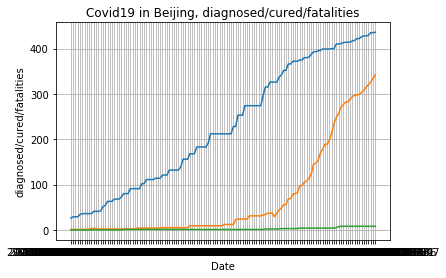

In [64]:
covid19_beijing = covid19_china[covid19_china['provinceEnglishName']=='Beijing']
covid19_beijing2 = covid19_beijing.sort_values(by=['updateTime'])
covid19_beijing3 = covid19_beijing2.set_index('updateTime')

plt.plot(covid19_beijing3.province_confirmedCount)
plt.plot(covid19_beijing3.province_curedCount)
plt.plot(covid19_beijing3.province_deadCount)

plt.title('Covid19 in Beijing, diagnosed/cured/fatalities')
plt.ylabel('diagnosed/cured/fatalities')
plt.xlabel('Date')
plt.grid(True)

And there are a lot more cities in the data!

In [20]:
', '.join([str(x) for x in covid19_china.cityEnglishName.values])

"Dandong, Shenyang, Dalian, Huludao, Chaoyang, Jinzhou, Panjin, Fuxin, Tieling, Anshan, Benxi, Liaoyang, Yingkou, Harbin, Shuangyashan, Suihua, Qiqihar, Daqing, Jixi, Qitaihe, Mudanjiang, Heihe, Hegang, Daxinganling, Jiamusi, Yichun, Qijiang District, Changshou District, Dazu District, Rongchang District, Wanzhou District, Jiangbei District, Yunyang County, Hechuan District, Fengjie County, Jiulongpo District, Kaizhou District, Zhong County, Yuzhong District, Dianjiang County, Tongnan District, Yubei District, Liangjiang New Area, Nan'an District, Shizhu Tujia Autonomous County, Wuxi County, Tongliang District, Fengdu County, Wushan County, Shapingba District, Bishan District, Dadukou District, Banan District, Fuling District, Yongchuan District, Jiangjin District, Liangping District, Chongqing High-tech Zone, Qianjiang Tujia and Miao Autonomous County, Chengkou County, Pengshui Miao and Tujia Autonomous County, Wulong District, Xiushan Tujia and Miao Autonomous County, Youyang Tujia a

# A possible model of infection

We're going to need version `3.8` of `PyMC3` for our modeling.

In [9]:
import pymc3 as pm
pm.__version__

'3.8'

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

## Acquired immunity controls the infection

The **Susceptible-Infected-Recovered** model of infection describes time dynamics of an 
[infectious disease](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) spreading through a homogenous closed population (no births or deaths). The population is divided into three categories: **Susceptible** `S`, **Infective** `I`, or **Recovered/Dead** `R`. We can further refine our model by having a different category `D` for dead, but let's keep it simple for now and include dead people as recovered. When people die, if properly buried, they cannot infect anymore and so they are equivalent to people that have recovered and are immune to the infection.

Susceptible individuals are those that have not acquired immunity yet and are susceptible to becoming infected.

Infected individuals have been infected with the disease.

Recovered individuals are cured and not susceptible anymore to the disease.

>**NOTE**: In China, some people have been described as cured and released from hospitals and yet they test positive again for Covid19 later on. This is actually impossible because if you recover, you *have to be immune* to the disease, and is most likley assocaited with false positives and false negatives (patients where either impoperly labeled as cured, or improperly tested as infected). It is also possible that we are dealing with multiple Covid19 strains, in which case it is possible to become infected with another strain after being cured from one. It may also be possible that the virus mutates so fast that it essentially becomes a different strain in a few days and can reinfect an immune individual. God help us all if that is the case.

[Differential equations](https://en.wikipedia.org/wiki/Ordinary_differential_equation) are a mathematical framework for modelling temporal dynamics of a system. The [differential equations for the SIR model of infection](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) are:

$$\dfrac{dS}{dt} = - \beta SI \quad S(0) = S_0$$

$$\dfrac{dI}{dt} = \beta SI - \gamma I \quad I(0) = I_0$$

$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$

With the constraint that: 

$$S(t) + I(t) + R(t) = 1 \;\;, \forall t$$

Other models are available for modeling infectious diseases, such as the [IBM](https://arxiv.org/ftp/arxiv/papers/1902/1902.02784.pdf) model.

If we know R(t) and I(t) then we can determine S(t): $S(t) = 1 - I(t) - R(t)$, so we can work only with the two unknowns: R(t) and I(t). We prefer to work with these because that is what the China Covid19 dataset gives us!

So we write:

$$\dfrac{dI}{dt} = \beta (1 - I - R) I - \gamma I \quad I(0) = I_0$$

$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$

Simplifying:

$$\dfrac{dI}{dt} = \beta (1 - I - R -\gamma/\beta) I  \quad I(0) = I_0$$

$$\dfrac{dR}{dt} = \gamma I \quad R(0) = R_0$$

We have two equations in two unknowns, so we're good mathematicaly speaking. What are the parameters?

$β$ is the rate of infection per susceptible and per infective individual: $\beta$ is an average infected to non-infected individual contact (e.g. 4 individuals) and hinges on the underlying society. Arguably, it is higher in China where the population is denser. But it also high in very social Mediterranean countries like Italy and Spain. $\gamma$ is the rate of recovery: It can be interpreted as an average period of infectiousness (e.g. 3 to 5 days for the common flu). For Covid19, experts are astonished by how long an individual can infect others and say that it can be up to 30 days! 

>For an example, in the Hong Kong flu in New York City in the late 1960's, hardly anyone was immune at the beginning of the epidemic, so almost everyone was susceptible. [This](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model) paper gives an estimate for the parameters. Assuming a trace level of infection in the population, say, 10 people, population variables are S(0) = 7,900,000, I(0) = 10, R(0) = 0. In terms of scaled variables, these initial conditions are s(0) = 1, i(0) = 1.27 x 10-6, r(0) = 0. We don't know values for the parameters $\beta$ and $\gamma$ yet, but they can be estimated and then adjusted as necessary to fit the excess death data. The average period of infectiousness is estimated at three days, so that would suggest  $\gamma = 1/3$.  *Guessing* that each infected individual would make a possibly infecting contact with another individual every two days, then $\beta$ would be $1/2$. So $\beta/\gamma = 3/2 > 1$.

The quantity $β/γ$ is called [R-Nought](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1181873/) ($R_0$). Its interpretation is that if we were to drop a *single* infected person into a population of suceptible individuals, we would expect $R_0$ new infections. If $R_0>1$, then an epidemic will take place. If $R_0≤1$ then there will be no epidemic.

>When $R_0<1$, each person who contracts the disease will infect fewer than one person before dying or recovering, so the outbreak will fizzle ($dI/dt<0$). When $R_0>1$, each person who gets the disease will infect more than one person, so the epidemic will spread ($dI/dt>0$). $R_0$ is the most important quantity in epidemiology.

Let's model our SIR equations using a python function. `y` is our unknown, it's 2D: $y[0] = I$ and $y[1] = R$. . The parameters `p` are 2D: $p[0] = \beta$ and $p[1] = \gamma$. 

In accordance with the `odeint` package of the `scipy.integrate` library for integrating (solving) ordinary differential equations, we'll write our `SIR` function thusly, assuming that the constant time step `dt` is equal to 1.

In [11]:
def SIR(y, t, p):
    di = p[0] * (1. - y[0] - y[1] - p[1]/p[0]) * y[0]
    dr = p[1] * y[0]
    return [di, dr]

In [12]:
def susceptible(i, r):
    return 1 - i - r

This will be our time discretization:

In [13]:
times = np.arange(0, 5, 0.25)

Let's compute *exact* values for `y` (y\[0\] = I and y\[1\] = R). Let's assume that I(0) = 0.01 and R(0) = 0. In other words, we start with 1% infected individuals in the population, 0 recovered, and so 1 - 0.01 - 0 = 99% susceptible individuals.

To prepare for our data estimation, let's start by picking some values for $\beta$ and $\gamma$ from a hat (we will model them based on China's data leter on), to guarantee an epidemic ($\beta > \gamma$), and see if we can actually solve our ODE.

In [14]:
beta, gamma = 4.0, 1.0

Realistically, an individual may be in infectious contact with less or more than 4 other individuals per day, and Covid19's infectivity period is much bigger than 1 day per individual, but let's go with these numbers.

We use the library `odeint` from the package `scipy.integrate` to solve the ordinary differential equations for SIR:

In [15]:
from scipy.integrate import odeint

# Compute true curves
y = odeint(SIR, t=times, y0=[0.01, 0.0], args=((beta, gamma),), rtol=1e-8)

The data has uncertainty (or ***noise***) because of our measurement tools ([aleatoric uncertainty](https://en.wikipedia.org/wiki/Uncertainty_quantification)), but also because the modeling equations are ot perfect ([epistemic uncertainity](https://en.wikipedia.org/wiki/Uncertainty_quantification)).

We pick a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), a continuous probability distribution whose logarithm is *normally distributed* (thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution) as our observations pdf, with a mean equal to the log of `y`. The idea for picking this distribution was Dimitri Pananos' idea, on a blog post highlighting new functionality for `PyMC3`. That post can be found in the references section in this notebook.

>**NOTE**: Recall that taking the logarithm of a histogram of a dataset makes the histogram look "*prettier*" (可爱极了), i.e. closer to a normal distribution, so that we can indeed model it as a normal distribution. So this is a common preprocessing operation in data science.

So, these may be our observations: Data from the true curves for I and R with errors 10% and 10% respectively

In [16]:
yobs = np.random.lognormal(mean=np.log(y[1::]), sigma=[0.1, 0.1])

Let's plot these observations as datapoints on top of the exact values for S and I. Note that R is not observed but estimated from the exact curves for S and I:

In [17]:
yobs

array([[0.02152122, 0.00371614],
       [0.03747861, 0.01306067],
       [0.08530631, 0.02434567],
       [0.1248505 , 0.06808261],
       [0.24997992, 0.09022543],
       [0.34884741, 0.17233984],
       [0.38146798, 0.27370836],
       [0.40200712, 0.37542981],
       [0.34821233, 0.46835361],
       [0.33305082, 0.5562813 ],
       [0.34586895, 0.69002402],
       [0.26367482, 0.69526107],
       [0.1971184 , 0.77343443],
       [0.15749306, 0.96260052],
       [0.11611039, 0.82150439],
       [0.1019318 , 0.81480331],
       [0.08411772, 0.97402679],
       [0.06459255, 0.84040777],
       [0.05251203, 0.88166701]])

In [18]:
yobs[:,0]

array([0.02152122, 0.03747861, 0.08530631, 0.1248505 , 0.24997992,
       0.34884741, 0.38146798, 0.40200712, 0.34821233, 0.33305082,
       0.34586895, 0.26367482, 0.1971184 , 0.15749306, 0.11611039,
       0.1019318 , 0.08411772, 0.06459255, 0.05251203])

In [19]:
yobs[:,1]

array([0.00371614, 0.01306067, 0.02434567, 0.06808261, 0.09022543,
       0.17233984, 0.27370836, 0.37542981, 0.46835361, 0.5562813 ,
       0.69002402, 0.69526107, 0.77343443, 0.96260052, 0.82150439,
       0.81480331, 0.97402679, 0.84040777, 0.88166701])

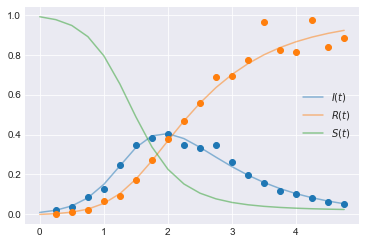

In [20]:
plt.plot(times[1::],yobs, marker='o', linestyle='none')
plt.plot(times, y[:,0], color='C0', alpha=0.5, label=f'$I(t)$')
plt.plot(times, y[:,1], color ='C1', alpha=0.5, label=f'$R(t)$')
plt.plot(times, susceptible(y[:,0], y[:,1]), color ='C2', alpha=0.5, label=f'$S(t)$')
plt.legend()

Driven by rising infections, susceptible population diminishes due to acquired immunity, which controls the infection and brings it down to zero after it reaches a peak of 40% of the population, for the values of the parameters $\beta$ and $\gamma$ that we picked. Very sobering.

Our China data though is only up to timepoint 2 in the graph above. We have *yet* to observe the infection to come down. All we observe in China is that *the number of new infections is coming down to almost zero*, which means we are approaching the peak of the Infected curve $I(t)$.

# Modeling with China's data

Let's model China's infection data with Bayesian estimation in order to figure out the critical Chinese $\beta$ and $\gamma$ parameters. Based on social comparisons, we may then estimate our own $\beta$ parameter, so that will give us a relative disease $R_0$, which will tell us how *dangerous* Covid19 is in our own society.

>Flyers about how the flu kills more people than Covid19 abounded around campus, and are probably partly responsible for the complacent response to the epidemic in Western societies. Let's see how much *more dangerous* than the flu it really is.

Let's plot Wuhan, Hubei's infected and cured populations once again:

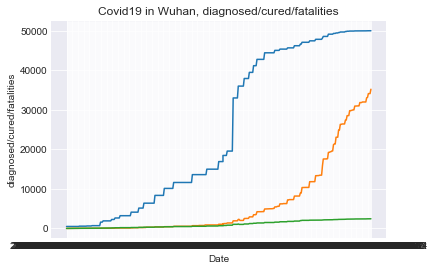

In [41]:
plt.plot(covid19_wuhan3.city_confirmedCount)
plt.plot(covid19_wuhan3.city_curedCount)
plt.plot(covid19_wuhan3.city_deadCount)

plt.title('Covid19 in Wuhan, diagnosed/cured/fatalities')
plt.ylabel('diagnosed/cured/fatalities')
plt.xlabel('Date')
plt.grid(True)

### Extrapolating Chinese data to the fizzling out of the pandemic

We will start with an upper range for $R_0$, by assuming that the virus has essentially impacted the entire city's population.

We have to complete the Chinese data since it only goes up to the peak. We will assume that what we hear from China is correct: The epidemic has peaked and is petering out, thanks to the draconian quarantine measures undertaken. So let's just mirror out the infected data so that it decreases at the same rate, and let's just continue the progression of the cured curve.

In [21]:
covid19_wuhan = covid19_china[covid19_china['cityEnglishName']=='Wuhan']

In [22]:
covid19_wuhan.drop_duplicates('updateTime', inplace = True)

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
covid19_wuhan2 = covid19_wuhan.sort_values(by=['updateTime'])

In [24]:
covid19_wuhan3 = covid19_wuhan2.set_index('updateTime')

In [25]:
covid19_wuhan4 = covid19_wuhan3.copy()

In [26]:
covid19_wuhan4

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,
2020-01-24 09:47:38.698,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:48:39.253,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:49:39.772,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:50:40.357,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 11:49:48.584,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:50.822,湖北省,Hubei,武汉,Wuhan,67773,49134,3046,49978,33117,2423
2020-03-12 09:21:37.890,湖北省,Hubei,武汉,Wuhan,67781,50298,3056,49986,34094,2430
2020-03-12 14:27:43.370,湖北省,Hubei,武汉,Wuhan,67781,50316,3056,49986,34094,2430


In [27]:
covid19_wuhan4.index

Index(['2020-01-24 09:47:38.698', '2020-01-24 09:48:39.253',
       '2020-01-24 09:49:39.772', '2020-01-24 09:50:40.357',
       '2020-01-24 11:49:48.584', '2020-01-24 12:23:06.852',
       '2020-01-24 12:24:07.515', '2020-01-24 12:51:13.280',
       '2020-01-24 13:15:28.296', '2020-01-24 13:16:28.914',
       ...
       '2020-03-10 16:30:50.904', '2020-03-10 16:43:54.036',
       '2020-03-10 23:01:19.213', '2020-03-11 09:12:44.046',
       '2020-03-11 13:56:46.112', '2020-03-11 18:49:50.822',
       '2020-03-12 09:21:37.890', '2020-03-12 14:27:43.370',
       '2020-03-12 17:33:24.482', '2020-03-13 11:08:59.974'],
      dtype='object', name='updateTime', length=359)

Let's regularize the time index.

In [29]:
from datetime import datetime
datetime.strptime('2020-03-12 17:33:24.482', '%Y-%m-%d %H:%M:%S.%f')

datetime.datetime(2020, 3, 12, 17, 33, 24, 482000)

In [30]:
covid19_wuhan4.index = covid19_wuhan4.index.map(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').replace(second=0))
covid19_wuhan4

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,
2020-01-24 09:47:00.698,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:48:00.253,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:49:00.772,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:50:00.357,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 11:49:00.584,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:00.822,湖北省,Hubei,武汉,Wuhan,67773,49134,3046,49978,33117,2423
2020-03-12 09:21:00.890,湖北省,Hubei,武汉,Wuhan,67781,50298,3056,49986,34094,2430
2020-03-12 14:27:00.370,湖北省,Hubei,武汉,Wuhan,67781,50316,3056,49986,34094,2430


In [31]:
covid19_wuhan4.index = covid19_wuhan4.index.map(
    lambda x: x.replace(microsecond=0))
covid19_wuhan4

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,
2020-01-24 09:47:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:48:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:49:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:50:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 11:49:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:00,湖北省,Hubei,武汉,Wuhan,67773,49134,3046,49978,33117,2423
2020-03-12 09:21:00,湖北省,Hubei,武汉,Wuhan,67781,50298,3056,49986,34094,2430
2020-03-12 14:27:00,湖北省,Hubei,武汉,Wuhan,67781,50316,3056,49986,34094,2430


In [32]:
covid19_wuhan4

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,
2020-01-24 09:47:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:48:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:49:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 09:50:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
2020-01-24 11:49:00,湖北省,Hubei,武汉,Wuhan,549,0,0,495,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:00,湖北省,Hubei,武汉,Wuhan,67773,49134,3046,49978,33117,2423
2020-03-12 09:21:00,湖北省,Hubei,武汉,Wuhan,67781,50298,3056,49986,34094,2430
2020-03-12 14:27:00,湖北省,Hubei,武汉,Wuhan,67781,50316,3056,49986,34094,2430


C:\Users\Dino\AppData\Roaming\Python\Python36\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


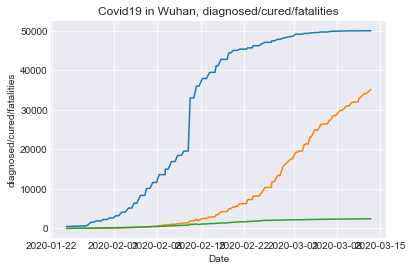

In [33]:
plt.plot(covid19_wuhan4.city_confirmedCount)
plt.plot(covid19_wuhan4.city_curedCount)
plt.plot(covid19_wuhan4.city_deadCount)

plt.title('Covid19 in Wuhan, diagnosed/cured/fatalities')
plt.ylabel('diagnosed/cured/fatalities')
plt.xlabel('Date')
plt.grid(True)

Let's drop some more columns:

In [34]:
drop_cols = ['provinceName', 'provinceEnglishName', 'cityName', 'cityEnglishName', 'province_confirmedCount', 'province_curedCount', 'province_deadCount']

covid19_wuhan5 = covid19_wuhan4.drop(drop_cols, axis=1)
covid19_wuhan5

,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,
2020-01-24 09:47:00,495,0,0
2020-01-24 09:48:00,495,0,0
2020-01-24 09:49:00,495,0,0
2020-01-24 09:50:00,495,0,0
2020-01-24 11:49:00,495,0,0
...,...,...,...
2020-03-11 18:49:00,49978,33117,2423
2020-03-12 09:21:00,49986,34094,2430
2020-03-12 14:27:00,49986,34094,2430


Let's tally up the deceased amongst the recovered, to keep with the SIR model.

In [35]:
covid19_wuhan5['city_recoveredCount'] = covid19_wuhan5.city_curedCount + covid19_wuhan5.city_deadCount
covid19_wuhan5

,city_confirmedCount,city_curedCount,city_deadCount,city_recoveredCount
updateTime,,,,
2020-01-24 09:47:00,495,0,0,0
2020-01-24 09:48:00,495,0,0,0
2020-01-24 09:49:00,495,0,0,0
2020-01-24 09:50:00,495,0,0,0
2020-01-24 11:49:00,495,0,0,0
...,...,...,...,...
2020-03-11 18:49:00,49978,33117,2423,35540
2020-03-12 09:21:00,49986,34094,2430,36524
2020-03-12 14:27:00,49986,34094,2430,36524


In [36]:
drop_cols = ['city_curedCount', 'city_deadCount']
covid19_wuhan6 = covid19_wuhan5.drop(drop_cols, axis=1)
covid19_wuhan6

,city_confirmedCount,city_recoveredCount
updateTime,,
2020-01-24 09:47:00,495,0
2020-01-24 09:48:00,495,0
2020-01-24 09:49:00,495,0
2020-01-24 09:50:00,495,0
2020-01-24 11:49:00,495,0
...,...,...
2020-03-11 18:49:00,49978,35540
2020-03-12 09:21:00,49986,36524
2020-03-12 14:27:00,49986,36524


Now let's extend an additional 3 months, where the epidemic (hopefully) tapers out:

In [37]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

date_after_month = covid19_wuhan5.index[0] + relativedelta(months=2, days=1)
date_after_month

Timestamp('2020-03-25 09:47:00')

In [38]:
extend_3_months = [x + relativedelta(months=1, days=19) for x in covid19_wuhan5.index]
extend_3_months

[Timestamp('2020-03-14 09:47:00'),
 Timestamp('2020-03-14 09:48:00'),
 Timestamp('2020-03-14 09:49:00'),
 Timestamp('2020-03-14 09:50:00'),
 Timestamp('2020-03-14 11:49:00'),
 Timestamp('2020-03-14 12:23:00'),
 Timestamp('2020-03-14 12:24:00'),
 Timestamp('2020-03-14 12:51:00'),
 Timestamp('2020-03-14 13:15:00'),
 Timestamp('2020-03-14 13:16:00'),
 Timestamp('2020-03-14 13:22:00'),
 Timestamp('2020-03-14 16:11:00'),
 Timestamp('2020-03-14 16:48:00'),
 Timestamp('2020-03-14 17:30:00'),
 Timestamp('2020-03-15 07:48:00'),
 Timestamp('2020-03-15 08:03:00'),
 Timestamp('2020-03-15 08:08:00'),
 Timestamp('2020-03-15 08:11:00'),
 Timestamp('2020-03-15 08:12:00'),
 Timestamp('2020-03-15 08:14:00'),
 Timestamp('2020-03-15 20:06:00'),
 Timestamp('2020-03-15 20:07:00'),
 Timestamp('2020-03-15 23:55:00'),
 Timestamp('2020-03-16 00:01:00'),
 Timestamp('2020-03-16 08:58:00'),
 Timestamp('2020-03-16 09:53:00'),
 Timestamp('2020-03-16 13:43:00'),
 Timestamp('2020-03-16 13:45:00'),
 Timestamp('2020-03-

Let;s do the simplest possible extrapolation: We will just mirror the infected curve, and linearly extrapolate the recovered curve.

In [39]:
city_confirmedCount_mirror = covid19_wuhan5.city_confirmedCount.tolist()
city_confirmedCount_mirror.reverse()
city_confirmedCount_mirror

[49991,
 49986,
 49986,
 49986,
 49978,
 49978,
 49965,
 49965,
 49965,
 49965,
 49965,
 49965,
 49965,
 49965,
 49948,
 49948,
 49948,
 49948,
 49948,
 49948,
 49912,
 49912,
 49912,
 49912,
 49912,
 49912,
 49871,
 49871,
 49871,
 49797,
 49797,
 49671,
 49671,
 49671,
 49671,
 49671,
 49671,
 49540,
 49540,
 49426,
 49426,
 49426,
 49315,
 49315,
 49315,
 49122,
 49122,
 49122,
 49122,
 49122,
 49122,
 48557,
 48557,
 48557,
 48557,
 48557,
 48557,
 48137,
 47824,
 47824,
 47824,
 47824,
 47824,
 47824,
 47824,
 47824,
 47441,
 47441,
 47441,
 47441,
 47441,
 47441,
 47441,
 47071,
 47071,
 47071,
 47071,
 47071,
 47071,
 47071,
 47071,
 47071,
 46607,
 46607,
 46201,
 46201,
 46201,
 46201,
 46201,
 46201,
 46201,
 45660,
 45660,
 45660,
 45660,
 45660,
 45660,
 45660,
 45660,
 45346,
 45346,
 45346,
 45346,
 45346,
 45346,
 45346,
 45346,
 45346,
 45027,
 45027,
 45027,
 45027,
 45027,
 45027,
 44412,
 44412,
 44412,
 44412,
 44412,
 44412,
 44412,
 44412,
 44412,
 44412,
 44412,


In [40]:
covid19_wuhan6.city_recoveredCount.tail()

updateTime
2020-03-11 18:49:00    35540
2020-03-12 09:21:00    36524
2020-03-12 14:27:00    36524
2020-03-12 17:33:00    36526
2020-03-13 11:08:00    37633
Name: city_recoveredCount, dtype: int64

In [41]:
delta_extrapolant = 37633 - 36524
delta_extrapolant

1109

In [42]:
delta_extrapolant = 300

In [43]:
len(extend_3_months)

359

In [44]:
city_recoveredCount_extrapolate = [37633 + delta_extrapolant + i*delta_extrapolant for i in range(0, len(extend_3_months))]
city_recoveredCount_extrapolate

[37933,
 38233,
 38533,
 38833,
 39133,
 39433,
 39733,
 40033,
 40333,
 40633,
 40933,
 41233,
 41533,
 41833,
 42133,
 42433,
 42733,
 43033,
 43333,
 43633,
 43933,
 44233,
 44533,
 44833,
 45133,
 45433,
 45733,
 46033,
 46333,
 46633,
 46933,
 47233,
 47533,
 47833,
 48133,
 48433,
 48733,
 49033,
 49333,
 49633,
 49933,
 50233,
 50533,
 50833,
 51133,
 51433,
 51733,
 52033,
 52333,
 52633,
 52933,
 53233,
 53533,
 53833,
 54133,
 54433,
 54733,
 55033,
 55333,
 55633,
 55933,
 56233,
 56533,
 56833,
 57133,
 57433,
 57733,
 58033,
 58333,
 58633,
 58933,
 59233,
 59533,
 59833,
 60133,
 60433,
 60733,
 61033,
 61333,
 61633,
 61933,
 62233,
 62533,
 62833,
 63133,
 63433,
 63733,
 64033,
 64333,
 64633,
 64933,
 65233,
 65533,
 65833,
 66133,
 66433,
 66733,
 67033,
 67333,
 67633,
 67933,
 68233,
 68533,
 68833,
 69133,
 69433,
 69733,
 70033,
 70333,
 70633,
 70933,
 71233,
 71533,
 71833,
 72133,
 72433,
 72733,
 73033,
 73333,
 73633,
 73933,
 74233,
 74533,
 74833,
 75133,


In [45]:
covid19_wuhan_extension = pd.DataFrame(list(zip(city_confirmedCount_mirror, city_recoveredCount_extrapolate)), 
                                      index = extend_3_months, columns =['city_confirmedCount', 'city_recoveredCount'])
covid19_wuhan_extension

,city_confirmedCount,city_recoveredCount
2020-03-14 09:47:00,49991,37933
2020-03-14 09:48:00,49986,38233
2020-03-14 09:49:00,49986,38533
2020-03-14 09:50:00,49986,38833
2020-03-14 11:49:00,49978,39133
...,...,...
2020-04-30 18:49:00,495,144133
2020-05-01 09:21:00,495,144433
2020-05-01 14:27:00,495,144733
2020-05-01 17:33:00,495,145033


In [46]:
covid19_wuhan_extension = pd.concat([covid19_wuhan6, covid19_wuhan_extension])
covid19_wuhan_extension

,city_confirmedCount,city_recoveredCount
2020-01-24 09:47:00,495,0
2020-01-24 09:48:00,495,0
2020-01-24 09:49:00,495,0
2020-01-24 09:50:00,495,0
2020-01-24 11:49:00,495,0
...,...,...
2020-04-30 18:49:00,495,144133
2020-05-01 09:21:00,495,144433
2020-05-01 14:27:00,495,144733
2020-05-01 17:33:00,495,145033


This yields the following curves:

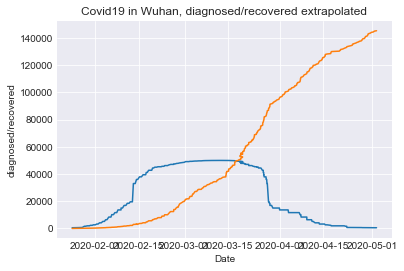

In [47]:
plt.plot(covid19_wuhan_extension.city_confirmedCount)
plt.plot(covid19_wuhan_extension.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

In [48]:
y_wuhan = covid19_wuhan_extension.to_numpy()
y_wuhan

array([[   495,      0],
       [   495,      0],
       [   495,      0],
       ...,
       [   495, 144733],
       [   495, 145033],
       [   495, 145333]], dtype=int64)

In [49]:
y_wuhan.shape

(718, 2)

Let's reduce the size of our data by an order of magnitude:

In [50]:
covid19_wuhan_extension3 = covid19_wuhan_extension[::38]  # Selects every 38th raw starting from 0

In [51]:
len(covid19_wuhan_extension3)

19

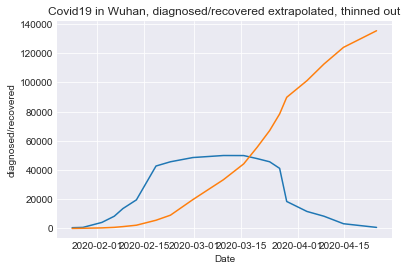

In [52]:
plt.plot(covid19_wuhan_extension3.city_confirmedCount)
plt.plot(covid19_wuhan_extension3.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated, thinned out')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

In [53]:
y_wuhan3 = covid19_wuhan_extension3.to_numpy()
y_wuhan3

array([[   495,      0],
       [   698,    105],
       [  4109,    362],
       [  8351,    736],
       [ 13603,   1243],
       [ 19558,   2199],
       [ 42752,   5602],
       [ 45660,   9066],
       [ 48557,  19737],
       [ 49948,  33374],
       [ 49912,  44233],
       [ 47824,  55633],
       [ 45660,  67033],
       [ 41152,  78433],
       [ 18454,  89833],
       [ 11618, 101233],
       [  8351, 112633],
       [  3215, 124033],
       [   698, 135433]], dtype=int64)

In [54]:
y_wuhan3.shape

(19, 2)

Now let's renormalize.

We might be tempted to do the following, but this does not respect the relative sizes of the infected and recovered curves:

In [188]:
from sklearn import preprocessing

x = covid19_wuhan_extension3.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
covid19_wuhan_extension4 = pd.DataFrame(x_scaled)

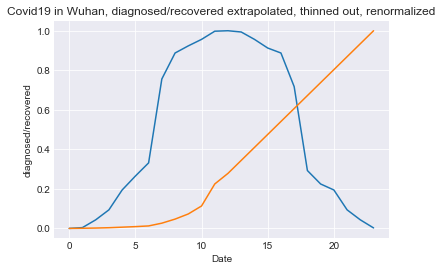

In [189]:
plt.plot(covid19_wuhan_extension4[0])
plt.plot(covid19_wuhan_extension4[1])

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated, thinned out, renormalized')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

How to extrapolate the recovered curve?

Since we're looking for an upper bound for $R_0$, let's make the ***naive*** assumption that 140,000 is the population of Wuhan that is susceptible to the virus (137233 is the max of the recovered column). This is ***most*** probably ***not true***, since the population of the city of [Wuhan](https://en.wikipedia.org/wiki/Wuhan), the 9th most populous Chinese city, is closer to 11 million. But probably not the entirety of that number is as exposed as the city center. I think the urban city center (9 million) may be a more appropriate statistic. 

Let's assume this number for now and proceed. We'll should do another analysis with a higher number.

In [55]:
covid19_wuhan_extension4 = covid19_wuhan_extension3.div(140000)
covid19_wuhan_extension4

,city_confirmedCount,city_recoveredCount
2020-01-24 09:47:00,0.003536,0.000000
2020-01-27 15:16:00,0.004986,0.000750
2020-02-02 07:28:00,0.029350,0.002586
2020-02-06 00:43:00,0.059650,0.005257
2020-02-08 15:01:00,0.097164,0.008879
2020-02-12 16:00:00,0.139700,0.015707
2020-02-18 13:05:00,0.305371,0.040014
2020-02-22 20:55:00,0.326143,0.064757
2020-02-29 14:14:00,0.346836,0.140979
2020-03-09 18:07:00,0.356771,0.238386


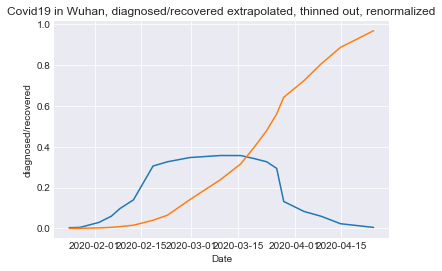

In [56]:
plt.plot(covid19_wuhan_extension4.city_confirmedCount)
plt.plot(covid19_wuhan_extension4.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated, thinned out, renormalized')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

In [57]:
y_wuhan4 = covid19_wuhan_extension4.to_numpy()
y_wuhan4

array([[3.53571429e-03, 0.00000000e+00],
       [4.98571429e-03, 7.50000000e-04],
       [2.93500000e-02, 2.58571429e-03],
       [5.96500000e-02, 5.25714286e-03],
       [9.71642857e-02, 8.87857143e-03],
       [1.39700000e-01, 1.57071429e-02],
       [3.05371429e-01, 4.00142857e-02],
       [3.26142857e-01, 6.47571429e-02],
       [3.46835714e-01, 1.40978571e-01],
       [3.56771429e-01, 2.38385714e-01],
       [3.56514286e-01, 3.15950000e-01],
       [3.41600000e-01, 3.97378571e-01],
       [3.26142857e-01, 4.78807143e-01],
       [2.93942857e-01, 5.60235714e-01],
       [1.31814286e-01, 6.41664286e-01],
       [8.29857143e-02, 7.23092857e-01],
       [5.96500000e-02, 8.04521429e-01],
       [2.29642857e-02, 8.85950000e-01],
       [4.98571429e-03, 9.67378571e-01]])

Let's do a  small fudge on the `e-04` number to get rid of pesky exponential notation:

In [58]:
# small fudge to get rid of exponential notation!
y_wuhan4[1,1] = 0.001
y_wuhan4

array([[0.00353571, 0.        ],
       [0.00498571, 0.001     ],
       [0.02935   , 0.00258571],
       [0.05965   , 0.00525714],
       [0.09716429, 0.00887857],
       [0.1397    , 0.01570714],
       [0.30537143, 0.04001429],
       [0.32614286, 0.06475714],
       [0.34683571, 0.14097857],
       [0.35677143, 0.23838571],
       [0.35651429, 0.31595   ],
       [0.3416    , 0.39737857],
       [0.32614286, 0.47880714],
       [0.29394286, 0.56023571],
       [0.13181429, 0.64166429],
       [0.08298571, 0.72309286],
       [0.05965   , 0.80452143],
       [0.02296429, 0.88595   ],
       [0.00498571, 0.96737857]])

Let's do another fudge on the first row's 0.0 cell, since without it the NUTS sim crashes out with a `Bad Initial Energy` error!

In [59]:
# to get rid of bad initial energy
y_wuhan4[0,1] = 0.001
y_wuhan4

array([[0.00353571, 0.001     ],
       [0.00498571, 0.001     ],
       [0.02935   , 0.00258571],
       [0.05965   , 0.00525714],
       [0.09716429, 0.00887857],
       [0.1397    , 0.01570714],
       [0.30537143, 0.04001429],
       [0.32614286, 0.06475714],
       [0.34683571, 0.14097857],
       [0.35677143, 0.23838571],
       [0.35651429, 0.31595   ],
       [0.3416    , 0.39737857],
       [0.32614286, 0.47880714],
       [0.29394286, 0.56023571],
       [0.13181429, 0.64166429],
       [0.08298571, 0.72309286],
       [0.05965   , 0.80452143],
       [0.02296429, 0.88595   ],
       [0.00498571, 0.96737857]])

In [60]:
yobs

array([[0.02152122, 0.00371614],
       [0.03747861, 0.01306067],
       [0.08530631, 0.02434567],
       [0.1248505 , 0.06808261],
       [0.24997992, 0.09022543],
       [0.34884741, 0.17233984],
       [0.38146798, 0.27370836],
       [0.40200712, 0.37542981],
       [0.34821233, 0.46835361],
       [0.33305082, 0.5562813 ],
       [0.34586895, 0.69002402],
       [0.26367482, 0.69526107],
       [0.1971184 , 0.77343443],
       [0.15749306, 0.96260052],
       [0.11611039, 0.82150439],
       [0.1019318 , 0.81480331],
       [0.08411772, 0.97402679],
       [0.06459255, 0.84040777],
       [0.05251203, 0.88166701]])

In [67]:
y_wuhan4.shape

(19, 2)

In [62]:
yobs.shape

(19, 2)

Now we have our data, we are ready for our Bayesian modeling!

### Bayesian modeling Chinese stats

We import `DifferentialEquation` from `PyMC3`:

In [63]:
import pymc3 as pm
from pymc3.ode import DifferentialEquation
import theano

Matching shapes for X (time) and Y:

In [ ]:
np.arange(0.25, 5, 0.2t).shape

Our epidemic model dynamics are captured thusly:

In [66]:
sir_model = DifferentialEquation(
    func = SIR,
    times = np.arange(0.25, 5, 0.25),
    n_states = 2,
    n_theta = 2,
    t0 = 0,
)

We will model observations with a [log-normal distribution](https://en.wikipedia.org/wiki/Log-normal_distribution), a continuous probability density function (pdf) whose logarithm is normally distributed. Thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution. 

Taking the logarithm of a dataset is a prettyfier of data and is often a first target model. So we will assume that our Chinese I (infected) and R (recovered) data are log-normally distributed.

We will assume that there is noise/error in the Chinese data, so we will tack on a standard deviation. Since that quantity is never negative, it is often modelled as a Half [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution) distribution. It has an interesting history.

>**NOTE**: The half-Cauchy is heavy tailed and is regarded as fairly weakly informative. Gelman advocates for half-t priors (including the half-Cauchy) because they have better behavior for small parameter values but only regards it as weakly informative when a large scale parameter is used. See [A. Gelman (2006),
"Prior distributions for variance parameters in hierarchical models"
Bayesian Analysis, Vol. 1, N. 3, pp. 515–533](http://www.stat.columbia.edu/~gelman/research/published/taumain.pdf). 

<br />
<center>
<img src="ipynb.images/half-cauchy.png" width=600 />
</center>

To model the parameters themselves, we will assume a very uninformative $R_0$ that is just $> 1$ so that we have an epidemic, a $\gamma$ that also follows a log-normal distribution (so we only use one pdf type for our model, but hey, *you're free to try another one*!), and a $\beta$ that is deterministically given by $\gamma * R_0$.

The data whose likelihood we're trying to model is given by the `sir_model` above: our function `SIR` given even further above, a time discretization from 0.25 to 5, starting from time 0, with 2D data (I, R) for Wuhan, Hubei, and 2D parameters (`R0` and `gama`). We pick Wuhan because it gives us the worst possible case since it's the epicenter of the disease.

Let's start our simulations with results we already know, to double-check our code. We will estimate the parameters for our `yobs` data, which was artifically created by picking some parameter values from the hat.

In [214]:
import arviz as az

with pm.Model() as model5:
    sigma = pm.HalfCauchy('sigma', 1, shape=2)

    # R0 is bounded below by 1 because we see an epidemic has occured
    R0 = pm.Bound(pm.Normal, lower=1)('R0', 2, 3)
    gama = pm.Lognormal('gama', pm.math.log(2), 2)
    beta = pm.Deterministic('beta', gama*R0)

    sir_curves = sir_model(y0=[0.01, 0.0], theta=[beta, gama])

    # data likelihood
    #Y = pm.Lognormal('Y', mu=pm.math.log(sir_curves), sd=sigma, observed=y_wuhan4)
    Y = pm.Lognormal('Y', mu=pm.math.log(sir_curves), sd=sigma, observed=yobs)

    prior = pm.sample_prior_predictive()
    trace = pm.sample(2000, tune=1000, target_accept=0.9, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [gama, R0, sigma]
Sampling chain 1, 0 divergences: 100%|██████████| 3000/3000 [39:40<00:00,  1.26it/s] 


Let's generate data from the model using parameters sampled from the posterior distribution:

In [218]:
with model5:
    posterior_predictive = pm.sample_posterior_predictive(trace)

100%|██████████| 4000/4000 [04:11<00:00, 15.92it/s]


Let's create some data:

In [219]:
with model5:
    data = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

Let's look at results:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A080C2F28>,
      dtype=object)

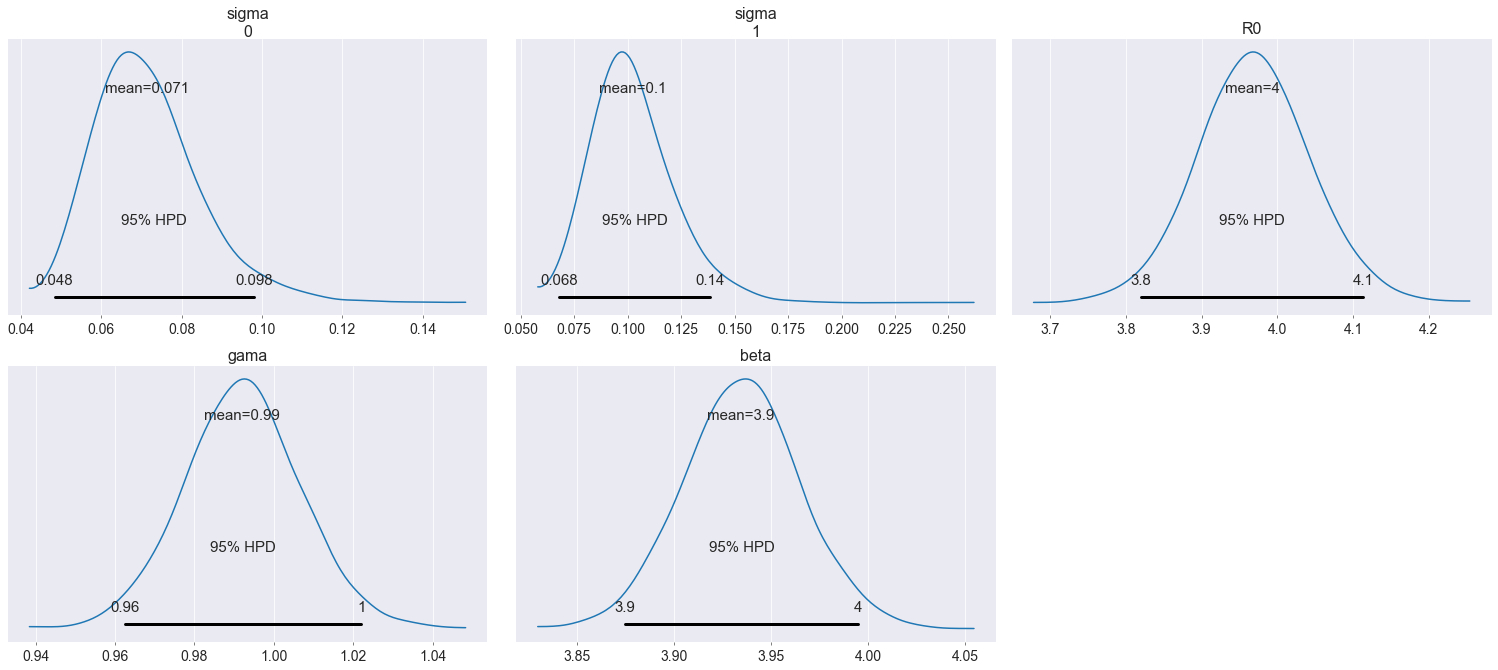

In [220]:
az.plot_posterior(data, round_to=2, credible_interval=0.95)

As can be seen from the posterior plots, $β$ is well estimated (4) by leveraging estimation of the non-dimensional parameter $R_0$ (3.9), and of $\gamma$ (1).

>**NOTE**: In general, the nonlinearity at the heart of epidemic models (e.g., the mass-action βSI term) can make the numerical work of model fitting very sensitive: Any given realization of a model can move away from the most likely model in a hurry. There may be only a very *narrow* band of possible parameter combinations that give reasonable estimates for your model and it is difficult to figure out a priori where that band might lie. In other words, don't expect MCMC-estimation to easily converge.

It is always a good strategy to use a *different model* to see if it yields similar results (from [here](https://en.wikipedia.org/wiki/List_of_probability_distributions)) (well, not really in this case since we *already* verified we obtain the right parameters, but don't forget that we are just getting *ready* for CoVid19 simulations). I immediately thought of the Poisson distribution, a discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space if these events occur with a known constant mean rate and independently of the time since the last event. After all, we are talking about discrete events: infections, recoveries. But the Poisson distribution has a *single* parameter, and this does not allow me to inject any *noise* in the observations.

Now that we're confident of our model, let's repeat the computation, with `wuhan4` data!

In [68]:
with pm.Model() as model7:
    sigma = pm.HalfCauchy('sigma', 1, shape=2)

    # R0 is bounded below by 1 because we see an epidemic has occured
    R0 = pm.Bound(pm.Normal, lower=1)('R0', 2, 3)
    gama = pm.Lognormal('gama', pm.math.log(2), 2)
    beta = pm.Deterministic('beta', gama*R0)

    sir_curves = sir_model(y0=[0.01, 0.0], theta=[beta, gama])

    # data likelihood
    Y = pm.Lognormal('Y', mu=pm.math.log(sir_curves), sd=sigma, observed=y_wuhan4)

    prior = pm.sample_prior_predictive()
    trace2 = pm.sample(2000, tune=1000, target_accept=0.9, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [gama, R0, sigma]
Sampling chain 1, 0 divergences: 100%|██████████| 3000/3000 [45:43<00:00,  1.09it/s] 
The number of effective samples is smaller than 25% for some parameters.


Let's generate data from the model using parameters sampled from the posterior distribution:

In [69]:
with model7:
    posterior_predictive2 = pm.sample_posterior_predictive(trace2)

100%|██████████| 4000/4000 [03:10<00:00, 20.96it/s]


In [71]:
import arviz as az

with model7:
    data2 = az.from_pymc3(trace=trace2, prior=prior, posterior_predictive=posterior_predictive2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001EB13573E48>,
      dtype=object)

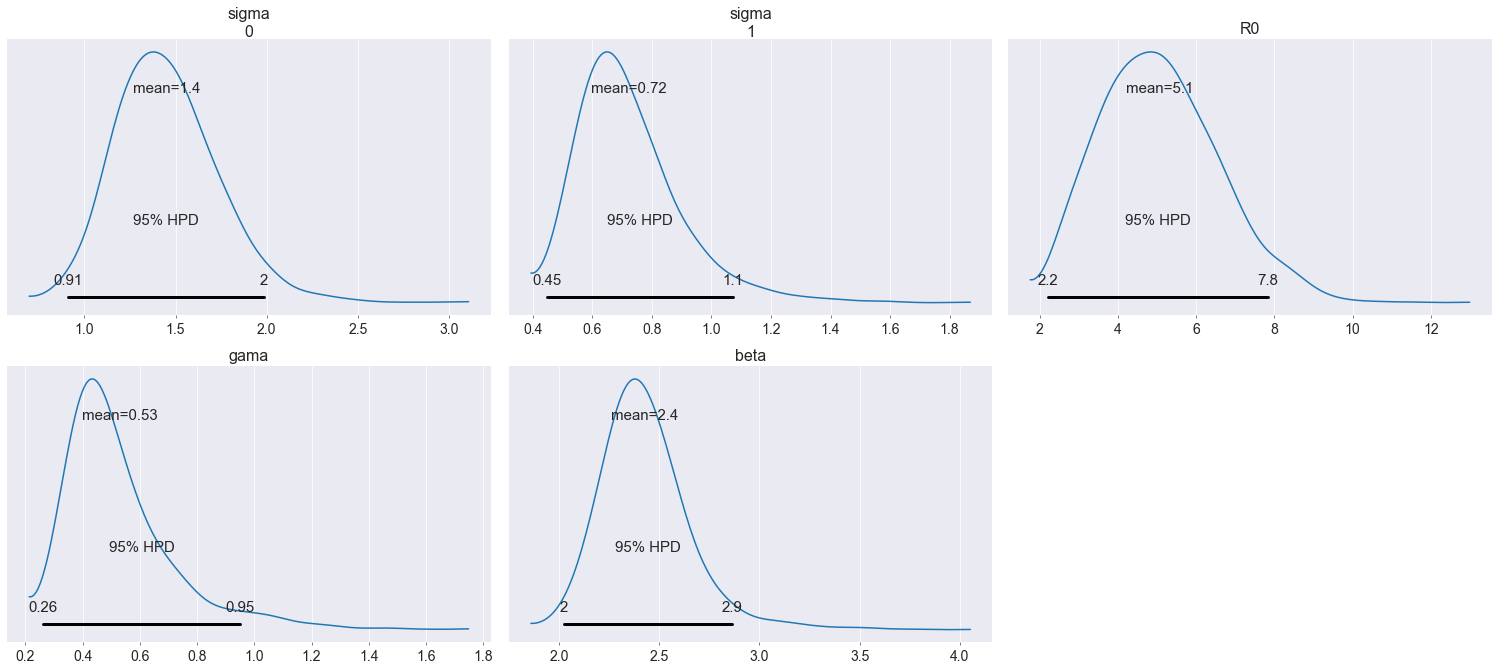

In [72]:
az.plot_posterior(data2, round_to=2, credible_interval=0.95)

# Results

We can now estimate the upper limit value of $R_0$ for the Coronavirus in Wuhan: $R_0 = 5.1$, for a suscpetible Wuhanese population of 150,000. That means one person infects about 5 people!

We can now rerun our ODE sim to see what percentage of the population ultimately gets infected:

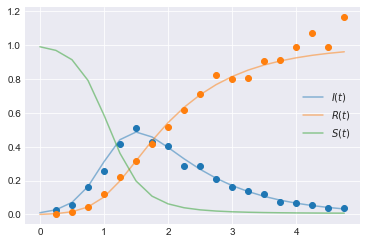

In [73]:
times = np.arange(0, 5, 0.25)
beta2, gamma = 5.1, 1.0
y2 = odeint(SIR, t=times, y0=[0.01, 0.0], args=((beta2, gamma),), rtol=1e-8)
yobs2 = np.random.lognormal(mean=np.log(y2[1::]), sigma=[0.1, 0.1])

plt.plot(times[1::],yobs2, marker='o', linestyle='none')
plt.plot(times, y2[:,0], color='C0', alpha=0.5, label=f'$I(t)$')
plt.plot(times, y2[:,1], color ='C1', alpha=0.5, label=f'$R(t)$')
plt.plot(times, susceptible(y2[:,0], y2[:,1]), color ='C2', alpha=0.5, label=f'$S(t)$')
plt.legend()

***Half*** of the population gets infected by covid19 before there is enough immunity for the disease to fizzle. And how many people die because of preexisting comorbid conditions or because they ingest too high of a virus load? Probably a *lot*. 

<br />
<center>
<img src="ipynb.images/R0eq5.png" width=600 />
</center>

## Interim conclusion

This estimation is based on the density of the population in Wuhan (very dense) and an *unrealistically low* total number of suscpetible people (140,000). So an $R_0$ of 5 is probably an *overestimation* and an upper bound of the $R_0$ for Covid19 in other parts of the world. Nevertheless, it underscores the infectivity of Covid19, which is much higher than the common flu. To think that I still see one-month old posters on the wall that clamor that the flu kills more people than Covid19. For reference, [Ebola](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4347917/) has an $R_0$ of *two*, so on average, a person who has Ebola will pass it on to *two* other people (of course Ebola, *once infected*, is a much deadlier virus). 

We will now move on to a more refined extrapolation, with different numbers for the suscpetible population, for future data.

## Middle ground for $R_0$

In [99]:
covid19_wuhan = covid19_china[covid19_china['cityEnglishName']=='Wuhan']

In [100]:
covid19_wuhan.drop_duplicates('updateTime', inplace = True)

d:\Anaconda3.5.1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
covid19_wuhan2 = covid19_wuhan.sort_values(by=['updateTime'])

In [102]:
covid19_wuhan3 = covid19_wuhan2.set_index('updateTime')

In [103]:
covid19_wuhan4 = covid19_wuhan3.copy()

In [104]:
covid19_wuhan4

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,,,,,
2020-01-24 09:47:38.698,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:48:39.253,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:49:39.772,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:50:40.357,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 11:49:48.584,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:50.822,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67773,0,49134,3046,49978,0,33117,2423
2020-03-12 09:21:37.890,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67781,0,50298,3056,49986,0,34094,2430
2020-03-12 14:27:43.370,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67781,0,50316,3056,49986,0,34094,2430


In [105]:
covid19_wuhan4.index

Index(['2020-01-24 09:47:38.698', '2020-01-24 09:48:39.253',
       '2020-01-24 09:49:39.772', '2020-01-24 09:50:40.357',
       '2020-01-24 11:49:48.584', '2020-01-24 12:23:06.852',
       '2020-01-24 12:24:07.515', '2020-01-24 12:51:13.280',
       '2020-01-24 13:15:28.296', '2020-01-24 13:16:28.914',
       ...
       '2020-03-10 16:30:50.904', '2020-03-10 16:43:54.036',
       '2020-03-10 23:01:19.213', '2020-03-11 09:12:44.046',
       '2020-03-11 13:56:46.112', '2020-03-11 18:49:50.822',
       '2020-03-12 09:21:37.890', '2020-03-12 14:27:43.370',
       '2020-03-12 17:33:24.482', '2020-03-13 11:08:59.974'],
      dtype='object', name='updateTime', length=359)

In [106]:
from datetime import datetime
datetime.strptime('2020-03-12 17:33:24.482', '%Y-%m-%d %H:%M:%S.%f')

datetime.datetime(2020, 3, 12, 17, 33, 24, 482000)

In [107]:
covid19_wuhan4.index = covid19_wuhan4.index.map(
    lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f').replace(second=0))
covid19_wuhan4

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,,,,,
2020-01-24 09:47:00.698,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:48:00.253,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:49:00.772,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:50:00.357,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 11:49:00.584,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:00.822,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67773,0,49134,3046,49978,0,33117,2423
2020-03-12 09:21:00.890,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67781,0,50298,3056,49986,0,34094,2430
2020-03-12 14:27:00.370,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67781,0,50316,3056,49986,0,34094,2430


In [108]:
covid19_wuhan4.index = covid19_wuhan4.index.map(
    lambda x: x.replace(microsecond=0))
covid19_wuhan4

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,,,,,
2020-01-24 09:47:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:48:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:49:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:50:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 11:49:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67773,0,49134,3046,49978,0,33117,2423
2020-03-12 09:21:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67781,0,50298,3056,49986,0,34094,2430
2020-03-12 14:27:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67781,0,50316,3056,49986,0,34094,2430


In [109]:
covid19_wuhan4

,provinceName,provinceEnglishName,province_zipCode,cityName,cityEnglishName,city_zipCode,province_confirmedCount,province_suspectedCount,province_curedCount,province_deadCount,city_confirmedCount,city_suspectedCount,city_curedCount,city_deadCount
updateTime,,,,,,,,,,,,,,
2020-01-24 09:47:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:48:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:49:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 09:50:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
2020-01-24 11:49:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,549,0,0,0,495,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-11 18:49:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67773,0,49134,3046,49978,0,33117,2423
2020-03-12 09:21:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67781,0,50298,3056,49986,0,34094,2430
2020-03-12 14:27:00,湖北省,Hubei,420000,武汉,Wuhan,420100.0,67781,0,50316,3056,49986,0,34094,2430


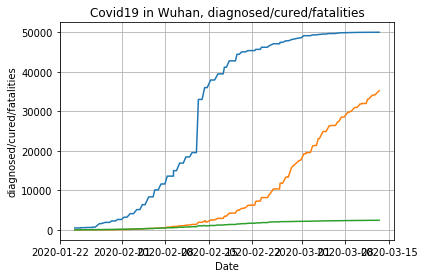

In [110]:
plt.plot(covid19_wuhan4.city_confirmedCount)
plt.plot(covid19_wuhan4.city_curedCount)
plt.plot(covid19_wuhan4.city_deadCount)

plt.title('Covid19 in Wuhan, diagnosed/cured/fatalities')
plt.ylabel('diagnosed/cured/fatalities')
plt.xlabel('Date')
plt.grid(True)

In [111]:
drop_cols = ['provinceName', 'provinceEnglishName', 'cityName', 'cityEnglishName', 'province_confirmedCount', 
             'province_curedCount', 'province_deadCount', 'province_suspectedCount', 'city_suspectedCount', 
             'province_zipCode', 'city_zipCode']

covid19_wuhan5 = covid19_wuhan4.drop(drop_cols, axis=1)
covid19_wuhan5

,city_confirmedCount,city_curedCount,city_deadCount
updateTime,,,
2020-01-24 09:47:00,495,0,0
2020-01-24 09:48:00,495,0,0
2020-01-24 09:49:00,495,0,0
2020-01-24 09:50:00,495,0,0
2020-01-24 11:49:00,495,0,0
...,...,...,...
2020-03-11 18:49:00,49978,33117,2423
2020-03-12 09:21:00,49986,34094,2430
2020-03-12 14:27:00,49986,34094,2430


In [112]:
drop_cols = ['province_suspectedCount', 'city_suspectedCount', 'province_zipCode', 'city_zipCode']

covid19_china.drop(drop_cols, axis=1, inplace=True)
covid19_china.head()

,provinceName,provinceEnglishName,cityName,cityEnglishName,province_confirmedCount,province_curedCount,province_deadCount,city_confirmedCount,city_curedCount,city_deadCount,updateTime
0,辽宁省,Liaoning,丹东,Dandong,125,113,1,11,7,0,2020-03-14 08:09:12.403
1,辽宁省,Liaoning,沈阳,Shenyang,125,113,1,28,26,0,2020-03-14 08:09:12.403
2,辽宁省,Liaoning,大连,Dalian,125,113,1,19,17,0,2020-03-14 08:09:12.403
3,辽宁省,Liaoning,葫芦岛,Huludao,125,113,1,12,9,1,2020-03-14 08:09:12.403
4,辽宁省,Liaoning,朝阳,Chaoyang,125,113,1,6,5,0,2020-03-14 08:09:12.403


In [113]:
covid19_wuhan5['city_recoveredCount'] = covid19_wuhan5.city_curedCount + covid19_wuhan5.city_deadCount
covid19_wuhan5

,city_confirmedCount,city_curedCount,city_deadCount,city_recoveredCount
updateTime,,,,
2020-01-24 09:47:00,495,0,0,0
2020-01-24 09:48:00,495,0,0,0
2020-01-24 09:49:00,495,0,0,0
2020-01-24 09:50:00,495,0,0,0
2020-01-24 11:49:00,495,0,0,0
...,...,...,...,...
2020-03-11 18:49:00,49978,33117,2423,35540
2020-03-12 09:21:00,49986,34094,2430,36524
2020-03-12 14:27:00,49986,34094,2430,36524


In [114]:
drop_cols = ['city_curedCount', 'city_deadCount']
covid19_wuhan6 = covid19_wuhan5.drop(drop_cols, axis=1)
covid19_wuhan6

,city_confirmedCount,city_recoveredCount
updateTime,,
2020-01-24 09:47:00,495,0
2020-01-24 09:48:00,495,0
2020-01-24 09:49:00,495,0
2020-01-24 09:50:00,495,0
2020-01-24 11:49:00,495,0
...,...,...
2020-03-11 18:49:00,49978,35540
2020-03-12 09:21:00,49986,36524
2020-03-12 14:27:00,49986,36524


We now look at an estimate plot we found:

<br />
<center>
<img src="ipynb.images/china-covid19.png" width=700 />
</center>

Based on this plot, we see that we probably need to extend for a longer time period, to give time for the epidemic to taper out.

In [115]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

date_after_month = covid19_wuhan5.index[0] + relativedelta(months=2, days=1)
date_after_month

Timestamp('2020-03-25 09:47:00')

In [116]:
extend_1month_19days = [x + relativedelta(months=1, days=19) for x in covid19_wuhan5.index]
extend_1month_19days

[Timestamp('2020-03-14 09:47:00'),
 Timestamp('2020-03-14 09:48:00'),
 Timestamp('2020-03-14 09:49:00'),
 Timestamp('2020-03-14 09:50:00'),
 Timestamp('2020-03-14 11:49:00'),
 Timestamp('2020-03-14 12:23:00'),
 Timestamp('2020-03-14 12:24:00'),
 Timestamp('2020-03-14 12:51:00'),
 Timestamp('2020-03-14 13:15:00'),
 Timestamp('2020-03-14 13:16:00'),
 Timestamp('2020-03-14 13:22:00'),
 Timestamp('2020-03-14 16:11:00'),
 Timestamp('2020-03-14 16:48:00'),
 Timestamp('2020-03-14 17:30:00'),
 Timestamp('2020-03-15 07:48:00'),
 Timestamp('2020-03-15 08:03:00'),
 Timestamp('2020-03-15 08:08:00'),
 Timestamp('2020-03-15 08:11:00'),
 Timestamp('2020-03-15 08:12:00'),
 Timestamp('2020-03-15 08:14:00'),
 Timestamp('2020-03-15 20:06:00'),
 Timestamp('2020-03-15 20:07:00'),
 Timestamp('2020-03-15 23:55:00'),
 Timestamp('2020-03-16 00:01:00'),
 Timestamp('2020-03-16 08:58:00'),
 Timestamp('2020-03-16 09:53:00'),
 Timestamp('2020-03-16 13:43:00'),
 Timestamp('2020-03-16 13:45:00'),
 Timestamp('2020-03-

In [117]:
len(extend_1month_19days)

359

In [118]:
extend_1month_19days[358]

Timestamp('2020-05-02 11:08:00')

In [119]:
extend_2more_months = [extend_1month_19days[358] + relativedelta(days=x) for x in range(1,60)]
extend_2more_months 

[Timestamp('2020-05-03 11:08:00'),
 Timestamp('2020-05-04 11:08:00'),
 Timestamp('2020-05-05 11:08:00'),
 Timestamp('2020-05-06 11:08:00'),
 Timestamp('2020-05-07 11:08:00'),
 Timestamp('2020-05-08 11:08:00'),
 Timestamp('2020-05-09 11:08:00'),
 Timestamp('2020-05-10 11:08:00'),
 Timestamp('2020-05-11 11:08:00'),
 Timestamp('2020-05-12 11:08:00'),
 Timestamp('2020-05-13 11:08:00'),
 Timestamp('2020-05-14 11:08:00'),
 Timestamp('2020-05-15 11:08:00'),
 Timestamp('2020-05-16 11:08:00'),
 Timestamp('2020-05-17 11:08:00'),
 Timestamp('2020-05-18 11:08:00'),
 Timestamp('2020-05-19 11:08:00'),
 Timestamp('2020-05-20 11:08:00'),
 Timestamp('2020-05-21 11:08:00'),
 Timestamp('2020-05-22 11:08:00'),
 Timestamp('2020-05-23 11:08:00'),
 Timestamp('2020-05-24 11:08:00'),
 Timestamp('2020-05-25 11:08:00'),
 Timestamp('2020-05-26 11:08:00'),
 Timestamp('2020-05-27 11:08:00'),
 Timestamp('2020-05-28 11:08:00'),
 Timestamp('2020-05-29 11:08:00'),
 Timestamp('2020-05-30 11:08:00'),
 Timestamp('2020-05-

In [120]:
extend_3_months = extend_1month_19days + extend_2more_months
extend_3_months

[Timestamp('2020-03-14 09:47:00'),
 Timestamp('2020-03-14 09:48:00'),
 Timestamp('2020-03-14 09:49:00'),
 Timestamp('2020-03-14 09:50:00'),
 Timestamp('2020-03-14 11:49:00'),
 Timestamp('2020-03-14 12:23:00'),
 Timestamp('2020-03-14 12:24:00'),
 Timestamp('2020-03-14 12:51:00'),
 Timestamp('2020-03-14 13:15:00'),
 Timestamp('2020-03-14 13:16:00'),
 Timestamp('2020-03-14 13:22:00'),
 Timestamp('2020-03-14 16:11:00'),
 Timestamp('2020-03-14 16:48:00'),
 Timestamp('2020-03-14 17:30:00'),
 Timestamp('2020-03-15 07:48:00'),
 Timestamp('2020-03-15 08:03:00'),
 Timestamp('2020-03-15 08:08:00'),
 Timestamp('2020-03-15 08:11:00'),
 Timestamp('2020-03-15 08:12:00'),
 Timestamp('2020-03-15 08:14:00'),
 Timestamp('2020-03-15 20:06:00'),
 Timestamp('2020-03-15 20:07:00'),
 Timestamp('2020-03-15 23:55:00'),
 Timestamp('2020-03-16 00:01:00'),
 Timestamp('2020-03-16 08:58:00'),
 Timestamp('2020-03-16 09:53:00'),
 Timestamp('2020-03-16 13:43:00'),
 Timestamp('2020-03-16 13:45:00'),
 Timestamp('2020-03-

In [121]:
df_extend_3_months = pd.DataFrame(extend_3_months, columns=['updateTime'])

In [122]:
df_extend_3_months

,updateTime
0,2020-03-14 09:47:00
1,2020-03-14 09:48:00
2,2020-03-14 09:49:00
3,2020-03-14 09:50:00
4,2020-03-14 11:49:00
...,...
413,2020-06-26 11:08:00
414,2020-06-27 11:08:00
415,2020-06-28 11:08:00
416,2020-06-29 11:08:00


In [123]:
df_extend_3_months.index = df_extend_3_months['updateTime']

In [124]:
df_extend_3_months

,updateTime
updateTime,
2020-03-14 09:47:00,2020-03-14 09:47:00
2020-03-14 09:48:00,2020-03-14 09:48:00
2020-03-14 09:49:00,2020-03-14 09:49:00
2020-03-14 09:50:00,2020-03-14 09:50:00
2020-03-14 11:49:00,2020-03-14 11:49:00
...,...
2020-06-26 11:08:00,2020-06-26 11:08:00
2020-06-27 11:08:00,2020-06-27 11:08:00
2020-06-28 11:08:00,2020-06-28 11:08:00


In [125]:
df_extend_3_months.drop(['updateTime'], axis=1, inplace=True)

In [126]:
df_extend_3_months

""
updateTime
2020-03-14 09:47:00
2020-03-14 09:48:00
2020-03-14 09:49:00
2020-03-14 09:50:00
2020-03-14 11:49:00
...
2020-06-26 11:08:00
2020-06-27 11:08:00
2020-06-28 11:08:00


In [127]:
df_extend_3_months['city_confirmedCount'] = float("NaN")
df_extend_3_months['city_recoveredCount'] = float("NaN")

In [128]:
df_extend_3_months

,city_confirmedCount,city_recoveredCount
updateTime,,
2020-03-14 09:47:00,NaN,NaN
2020-03-14 09:48:00,NaN,NaN
2020-03-14 09:49:00,NaN,NaN
2020-03-14 09:50:00,NaN,NaN
2020-03-14 11:49:00,NaN,NaN
...,...,...
2020-06-26 11:08:00,NaN,NaN
2020-06-27 11:08:00,NaN,NaN
2020-06-28 11:08:00,NaN,NaN


In [129]:
len(df_extend_3_months)

418

In [130]:
df_extend_3_months.index

DatetimeIndex(['2020-03-14 09:47:00', '2020-03-14 09:48:00',
               '2020-03-14 09:49:00', '2020-03-14 09:50:00',
               '2020-03-14 11:49:00', '2020-03-14 12:23:00',
               '2020-03-14 12:24:00', '2020-03-14 12:51:00',
               '2020-03-14 13:15:00', '2020-03-14 13:16:00',
               ...
               '2020-06-21 11:08:00', '2020-06-22 11:08:00',
               '2020-06-23 11:08:00', '2020-06-24 11:08:00',
               '2020-06-25 11:08:00', '2020-06-26 11:08:00',
               '2020-06-27 11:08:00', '2020-06-28 11:08:00',
               '2020-06-29 11:08:00', '2020-06-30 11:08:00'],
              dtype='datetime64[ns]', name='updateTime', length=418, freq=None)

In [131]:
covid19_wuhan7 = pd.concat([covid19_wuhan6, df_extend_3_months], sort=False)

In [132]:
covid19_wuhan7

,city_confirmedCount,city_recoveredCount
updateTime,,
2020-01-24 09:47:00,495.0,0.0
2020-01-24 09:48:00,495.0,0.0
2020-01-24 09:49:00,495.0,0.0
2020-01-24 09:50:00,495.0,0.0
2020-01-24 11:49:00,495.0,0.0
...,...,...
2020-06-26 11:08:00,NaN,NaN
2020-06-27 11:08:00,NaN,NaN
2020-06-28 11:08:00,NaN,NaN


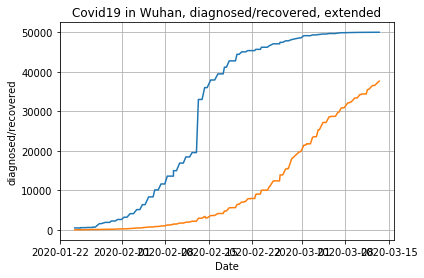

In [133]:
plt.plot(covid19_wuhan7.city_confirmedCount)
plt.plot(covid19_wuhan7.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered, extended')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

Now we have to extrapolate the I and R curves.

Let's start with the I curve.

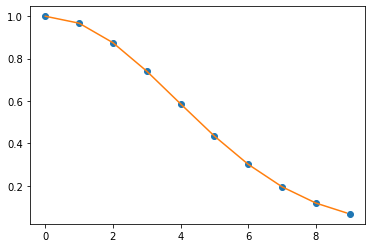

In [134]:
from scipy import interpolate
x = np.arange(0, 10)
y = np.exp(-x**2/30.0)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

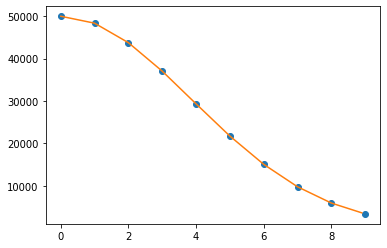

In [135]:
x = np.arange(0, 10)
peak = 50000
y = peak * np.exp(-x**2/30.0)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

In [136]:
covid19_wuhan7.city_confirmedCount[358], covid19_wuhan7.city_confirmedCount[359], len(covid19_wuhan7)

(49991.0, nan, 777)

In [137]:
777 - 358

419

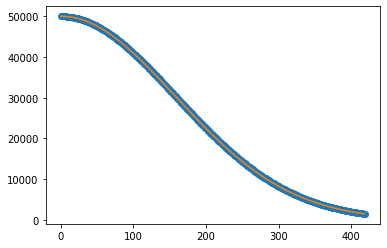

In [138]:
x = np.arange(0, 420)
peak = 50000
y = peak * np.exp(-x**2/peak)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 419, 1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

In [139]:
len(ynew), len(covid19_wuhan7.city_confirmedCount[359:777])

(419, 418)

In [140]:
covid19_wuhan7.city_confirmedCount[359:777] = ynew[:-1]

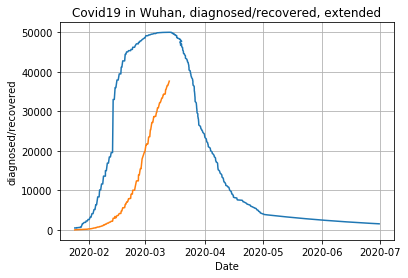

In [141]:
plt.plot(covid19_wuhan7.city_confirmedCount)
plt.plot(covid19_wuhan7.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered, extended')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

Now for the R curve.

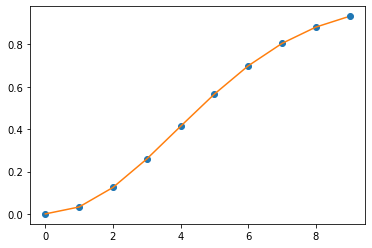

In [142]:
x = np.arange(0, 10)
y = 1 - np.exp(-x**2/30.0)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

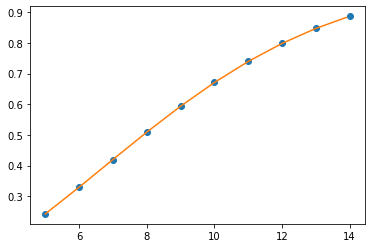

In [143]:
x = np.arange(5, 15)
y = 1 - np.exp(-x**2/90.0)
f = interpolate.interp1d(x, y)
xnew = np.arange(5, 14, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

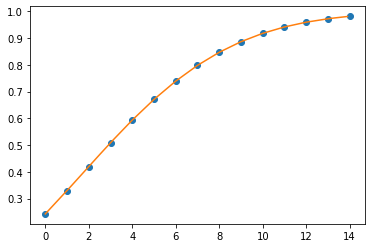

In [144]:
x = np.arange(0, 15)
y = 1 - np.exp(-(x+5)**2/90.0)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 14, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

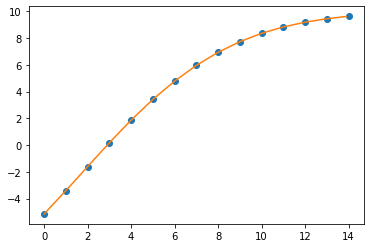

In [145]:
x = np.arange(0, 15)
y = 10 - 20*np.exp(-(x+5)**2/90.0)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 14, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

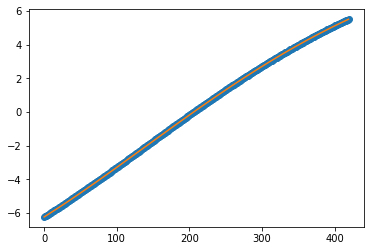

In [146]:
x = np.arange(0, 420)
y = 10 - 20*np.exp(-(x+250)**2/300000)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 419, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

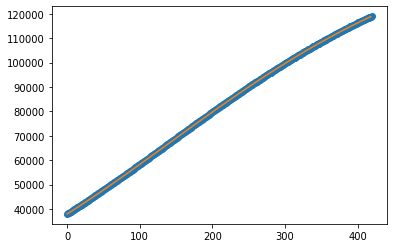

In [147]:
###### x = np.arange(0, 420)
y = 150000 - 138000*np.exp(-(x+250)**2/300000)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 419, 1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

In [148]:
ynew[0]

37952.78423121238

In [149]:
covid19_wuhan7.city_recoveredCount[358], covid19_wuhan7.city_recoveredCount[359], len(covid19_wuhan7)

(37633.0, nan, 777)

In [150]:
len(ynew), len(covid19_wuhan7.city_recoveredCount[359:777])

(419, 418)

In [151]:
covid19_wuhan7.city_recoveredCount[359:777] = ynew[:-1]

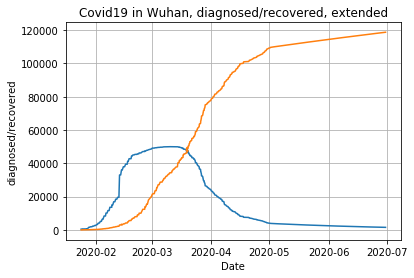

In [152]:
plt.plot(covid19_wuhan7.city_confirmedCount)
plt.plot(covid19_wuhan7.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered, extended')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

In [153]:
covid19_wuhan7

,city_confirmedCount,city_recoveredCount
updateTime,,
2020-01-24 09:47:00,495.000000,0.000000
2020-01-24 09:48:00,495.000000,0.000000
2020-01-24 09:49:00,495.000000,0.000000
2020-01-24 09:50:00,495.000000,0.000000
2020-01-24 11:49:00,495.000000,0.000000
...,...,...
2020-06-26 11:08:00,1649.781748,118118.570748
2020-06-27 11:08:00,1622.718786,118259.281502
2020-06-28 11:08:00,1596.035921,118399.581890


In [154]:
covid19_wuhan8 = covid19_wuhan7[::42]  # Selects every 42nd raw starting from 0
len(covid19_wuhan8)

19

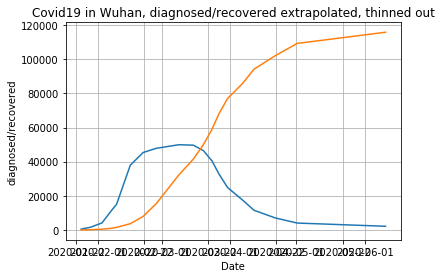

In [155]:
plt.plot(covid19_wuhan8.city_confirmedCount)
plt.plot(covid19_wuhan8.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated, thinned out')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

In [156]:
covid19_wuhan8.to_numpy()

array([[   495.        ,      0.        ],
       [  1590.        ,    132.        ],
       [  4109.        ,    399.        ],
       [ 11618.        ,    974.        ],
       [ 14982.        ,   1485.        ],
       [ 37914.        ,   3642.        ],
       [ 45346.        ,   7898.        ],
       [ 47824.        ,  15432.        ],
       [ 49912.        ,  32278.        ],
       [ 49640.30007926,  41575.90403277],
       [ 46414.08668136,  50031.97830227],
       [ 40440.95485127,  58906.14471023],
       [ 32835.91892612,  67963.00108155],
       [ 24844.66410716,  76983.14157437],
       [ 17517.54596888,  85771.28712071],
       [ 11509.84786982,  94162.23950932],
       [  7047.28901103, 102024.50537855],
       [  4020.9693501 , 109261.63196995],
       [  2137.94054909, 115811.46507259]])

Renormalizing:

In [157]:
covid19_wuhan9 = covid19_wuhan8.div(115812)
covid19_wuhan9

,city_confirmedCount,city_recoveredCount
updateTime,,
2020-01-24 09:47:00,0.004274,0.000000
2020-01-28 16:36:00,0.013729,0.001140
2020-02-02 20:50:00,0.035480,0.003445
2020-02-07 07:15:00,0.100318,0.008410
2020-02-09 11:01:00,0.129365,0.012823
2020-02-15 16:32:00,0.327375,0.031448
2020-02-21 12:12:00,0.391548,0.068197
2020-02-27 11:55:00,0.412945,0.133250
2020-03-08 18:05:00,0.430974,0.278710


In [158]:
y_wuhan9 = covid19_wuhan9.to_numpy()
y_wuhan9

array([[0.00427417, 0.        ],
       [0.01372915, 0.00113978],
       [0.03547992, 0.00344524],
       [0.10031776, 0.00841018],
       [0.12936483, 0.01282251],
       [0.3273754 , 0.03144752],
       [0.39154837, 0.06819673],
       [0.41294512, 0.13325044],
       [0.43097434, 0.27871032],
       [0.42862829, 0.35899478],
       [0.40077096, 0.43201031],
       [0.34919486, 0.50863593],
       [0.28352778, 0.58683902],
       [0.21452582, 0.66472509],
       [0.15125847, 0.74060794],
       [0.0993839 , 0.81306116],
       [0.06085111, 0.88094934],
       [0.0347198 , 0.94343964],
       [0.01846044, 0.99999538]])

Without the fudge below, the NUTS sim will probably crash out with `Bad Initial Energy` error!

In [159]:
# to get rid of bad initial energy
y_wuhan9[0,1] = 0.0010
y_wuhan9

array([[0.00427417, 0.001     ],
       [0.01372915, 0.00113978],
       [0.03547992, 0.00344524],
       [0.10031776, 0.00841018],
       [0.12936483, 0.01282251],
       [0.3273754 , 0.03144752],
       [0.39154837, 0.06819673],
       [0.41294512, 0.13325044],
       [0.43097434, 0.27871032],
       [0.42862829, 0.35899478],
       [0.40077096, 0.43201031],
       [0.34919486, 0.50863593],
       [0.28352778, 0.58683902],
       [0.21452582, 0.66472509],
       [0.15125847, 0.74060794],
       [0.0993839 , 0.81306116],
       [0.06085111, 0.88094934],
       [0.0347198 , 0.94343964],
       [0.01846044, 0.99999538]])

In [160]:
y_wuhan9.shape

(19, 2)

Now we have our data, we are ready for our Bayesian modeling!

### Bayesian modeling Chinese stats

We import `DifferentialEquation` from `PyMC3`:

In [161]:
import pymc3 as pm
from pymc3.ode import DifferentialEquation
import theano

Matching shapes for X (time) and Y:

In [162]:
np.arange(0.25, 5, 0.25).shape

(19,)

Our epidemic model dynamics are captured thusly (repeated from above for peace of mind):

In [163]:
def SIR(y, t, p):
    di = p[0] * (1. - y[0] - y[1] - p[1]/p[0]) * y[0]
    dr = p[1] * y[0]
    return [di, dr]

In [164]:
def susceptible(i, r):
    return 1 - i - r

In [165]:
sir_model = DifferentialEquation(
    func = SIR,
    times = np.arange(0.25, 5, 0.25),
    n_states = 2,
    n_theta = 2,
    t0 = 0,
)

In [166]:
import arviz as az

with pm.Model() as model9:
    sigma = pm.HalfCauchy('sigma', 1, shape=2)

    # R0 is bounded below by 1 because we see an epidemic has occured
    R0 = pm.Bound(pm.Normal, lower=1)('R0', 2, 3)
    gama = pm.Lognormal('gama', pm.math.log(2), 2)
    beta = pm.Deterministic('beta', gama*R0)

    sir_curves = sir_model(y0=[0.01, 0.0], theta=[beta, gama])

    # data likelihood
    Y = pm.Lognormal('Y', mu=pm.math.log(sir_curves), sd=sigma, observed=y_wuhan9)

    prior = pm.sample_prior_predictive()
    trace = pm.sample(2000, tune=1000, target_accept=0.9, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [gama, R0, sigma]
Sampling chain 1, 0 divergences: 100%|██████████| 3000/3000 [43:30<00:00,  1.15it/s]  
The number of effective samples is smaller than 25% for some parameters.


Let's generate data from the model using parameters sampled from the posterior distribution:

In [167]:
with model9:
    posterior_predictive = pm.sample_posterior_predictive(trace)

100%|██████████| 4000/4000 [04:19<00:00, 15.39it/s]


In [169]:
with model9:
    data = az.from_pymc3(trace=trace, prior=prior, posterior_predictive=posterior_predictive)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D0EFA5AC8>,
      dtype=object)

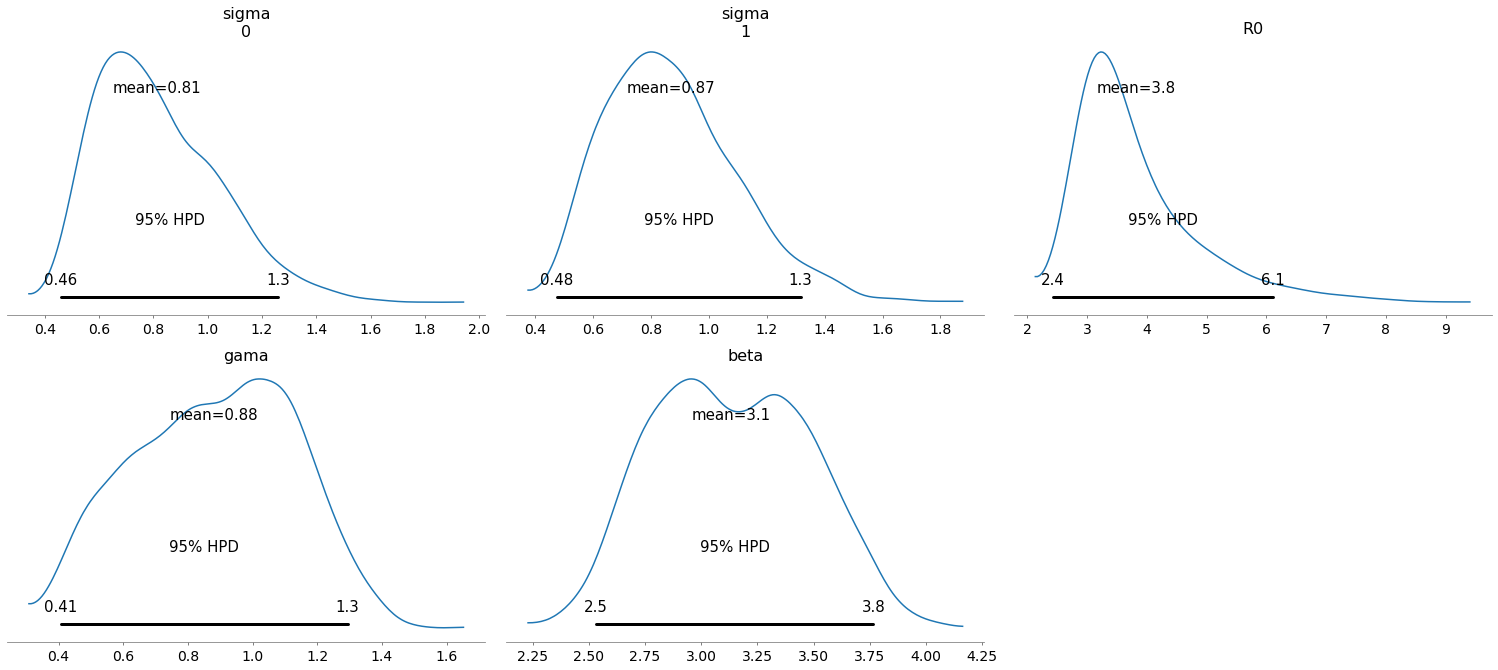

In [170]:
az.plot_posterior(data, round_to=2, credible_interval=0.95)

As can be seen from the posterior plots, $R_0$ is estimated at 3.8. 

## Lower bound for $R_0$ (highest susceptible population estimate)

Now we repeat the computation, with a ***higher susceptible population with a recovered profile commensurate with a tapering out of the epidemic in June***.

In [ ]:
10000000 - 37900

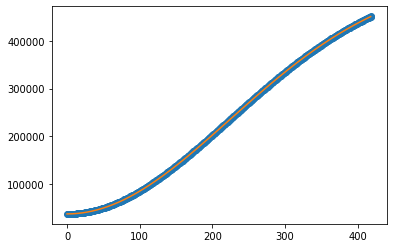

In [171]:
x = np.arange(0, 420)

#y = 10000000 - 12269500*np.exp(-(x+250)**2/300000)
#y = 10000000 - 11647000*np.exp(-(x+250)**2/400000)
#y = 10000000 - 10024000*np.exp(-(x+50)**2/400000)
#y = 10000000 - 9962100*np.exp(-(x)**2/400000)

#x0,y0 = 0,37900, x1,y1 = 420,max
#y = ax +b
#b = 37900
#a = (max - 37900) / 420
#y = (400000. - 37900.) / 420.*x + 37900

y = 537900 - 500000*np.exp(-(x)**2/100000)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 419, 1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')

In [172]:
ynew[0]

37900.0

In [173]:
covid19_wuhan7.city_recoveredCount[359:777] = ynew[:-1]

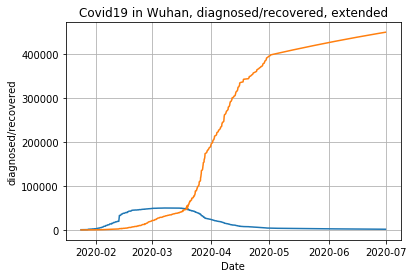

In [174]:
plt.plot(covid19_wuhan7.city_confirmedCount)
plt.plot(covid19_wuhan7.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered, extended')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

This corresponds to a much "*flatter*" I curve. This is what it means to "*flatten the curve*" (of the disease), which you may have heard a lot of, lately.

Zooming in:

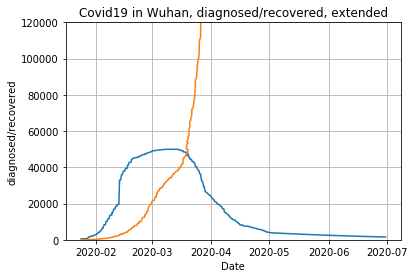

In [175]:
plt.plot(covid19_wuhan7.city_confirmedCount)
plt.plot(covid19_wuhan7.city_recoveredCount)

plt.ylim(0, 120000)
plt.title('Covid19 in Wuhan, diagnosed/recovered, extended')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

And so we see this corresponds to a lower bound of the $R_0$ of the disease, because the recovered count skyrockets unrealistically. Also, the amount of individuals recovered exceeds the amount of individuals infected, which is nonsensical. This will be addressed by renormalization further, which will have the effect of flattening the curve, but this just reflects our attempt to produce a safe lower bound for $R_0$.

Let's thin out the data:

In [176]:
covid19_wuhan8 = covid19_wuhan7[::42]  # Selects every 42nd raw starting from 0
len(covid19_wuhan8)

19

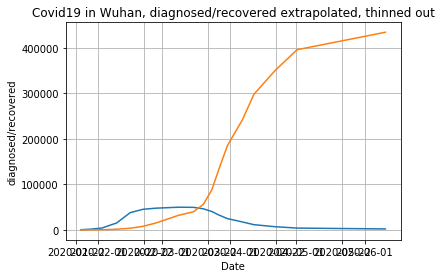

In [177]:
plt.plot(covid19_wuhan8.city_confirmedCount)
plt.plot(covid19_wuhan8.city_recoveredCount)

plt.title('Covid19 in Wuhan, diagnosed/recovered extrapolated, thinned out')
plt.ylabel('diagnosed/recovered')
plt.xlabel('Date')
plt.grid(True)

In [178]:
covid19_wuhan8.to_numpy()

array([[4.95000000e+02, 0.00000000e+00],
       [1.59000000e+03, 1.32000000e+02],
       [4.10900000e+03, 3.99000000e+02],
       [1.16180000e+04, 9.74000000e+02],
       [1.49820000e+04, 1.48500000e+03],
       [3.79140000e+04, 3.64200000e+03],
       [4.53460000e+04, 7.89800000e+03],
       [4.78240000e+04, 1.54320000e+04],
       [4.99120000e+04, 3.22780000e+04],
       [4.96403001e+04, 3.97017459e+04],
       [4.64140867e+04, 5.61631077e+04],
       [4.04409549e+04, 8.82281482e+04],
       [3.28359189e+04, 1.32709187e+05],
       [2.48446641e+04, 1.85446712e+05],
       [1.75175460e+04, 2.41947757e+05],
       [1.15098479e+04, 2.98005775e+05],
       [7.04728901e+03, 3.50186268e+05],
       [4.02096935e+03, 3.96108439e+05],
       [2.13794055e+03, 4.34508981e+05]])

Let's normalize:

In [179]:
covid19_wuhan9 = covid19_wuhan8.div(4.34510000e+05)
covid19_wuhan9

,city_confirmedCount,city_recoveredCount
updateTime,,
2020-01-24 09:47:00,0.001139,0.000000
2020-01-28 16:36:00,0.003659,0.000304
2020-02-02 20:50:00,0.009457,0.000918
2020-02-07 07:15:00,0.026738,0.002242
2020-02-09 11:01:00,0.034480,0.003418
2020-02-15 16:32:00,0.087257,0.008382
2020-02-21 12:12:00,0.104361,0.018177
2020-02-27 11:55:00,0.110064,0.035516
2020-03-08 18:05:00,0.114870,0.074286


In [180]:
y_wuhan9 = covid19_wuhan9.to_numpy()
y_wuhan9

array([[1.13921429e-03, 0.00000000e+00],
       [3.65929438e-03, 3.03790477e-04],
       [9.45662931e-03, 9.18275759e-04],
       [2.67381648e-02, 2.24160549e-03],
       [3.44802191e-02, 3.41764286e-03],
       [8.72569101e-02, 8.38185542e-03],
       [1.04361234e-01, 1.81767969e-02],
       [1.10064210e-01, 3.55158684e-02],
       [1.14869623e-01, 7.42859773e-02],
       [1.14244321e-01, 9.13713054e-02],
       [1.06819375e-01, 1.29256191e-01],
       [9.30725526e-02, 2.03052055e-01],
       [7.55699959e-02, 3.05422631e-01],
       [5.71785784e-02, 4.26795037e-01],
       [4.03156336e-02, 5.56828974e-01],
       [2.64892589e-02, 6.85843305e-01],
       [1.62189340e-02, 8.05933738e-01],
       [9.25403178e-03, 9.11620996e-01],
       [4.92034832e-03, 9.99997656e-01]])

In [181]:
# to get rid of potential bad initial energy
y_wuhan9[0,1] = 1.03790477e-04
y_wuhan9

array([[1.13921429e-03, 1.03790477e-04],
       [3.65929438e-03, 3.03790477e-04],
       [9.45662931e-03, 9.18275759e-04],
       [2.67381648e-02, 2.24160549e-03],
       [3.44802191e-02, 3.41764286e-03],
       [8.72569101e-02, 8.38185542e-03],
       [1.04361234e-01, 1.81767969e-02],
       [1.10064210e-01, 3.55158684e-02],
       [1.14869623e-01, 7.42859773e-02],
       [1.14244321e-01, 9.13713054e-02],
       [1.06819375e-01, 1.29256191e-01],
       [9.30725526e-02, 2.03052055e-01],
       [7.55699959e-02, 3.05422631e-01],
       [5.71785784e-02, 4.26795037e-01],
       [4.03156336e-02, 5.56828974e-01],
       [2.64892589e-02, 6.85843305e-01],
       [1.62189340e-02, 8.05933738e-01],
       [9.25403178e-03, 9.11620996e-01],
       [4.92034832e-03, 9.99997656e-01]])

In [182]:
y_wuhan9.shape

(19, 2)

In [183]:
with pm.Model() as model10:
    sigma = pm.HalfCauchy('sigma', 1, shape=2)

    # R0 is bounded below by 1 because we see an epidemic has occured
    R0 = pm.Bound(pm.Normal, lower=1)('R0', 2, 3)
    gama = pm.Lognormal('gama', pm.math.log(2), 2)
    beta = pm.Deterministic('beta', gama*R0)

    sir_curves = sir_model(y0=[0.01, 0.0], theta=[beta, gama])

    # data likelihood
    Y = pm.Lognormal('Y', mu=pm.math.log(sir_curves), sd=sigma, observed=y_wuhan9)

    prior = pm.sample_prior_predictive()
    trace10 = pm.sample(2000, tune=1000, target_accept=0.9, cores=1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [gama, R0, sigma]
Sampling chain 1, 0 divergences: 100%|██████████| 3000/3000 [26:02<00:00,  1.92it/s]
The number of effective samples is smaller than 10% for some parameters.


In [184]:
with model10:
    posterior_predictive10 = pm.sample_posterior_predictive(trace10)

100%|██████████| 4000/4000 [02:37<00:00, 25.41it/s]


In [185]:
import arviz as az

with model10:
    data10 = az.from_pymc3(trace=trace10, prior=prior, posterior_predictive=posterior_predictive10)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E56E1B438>,
      dtype=object)

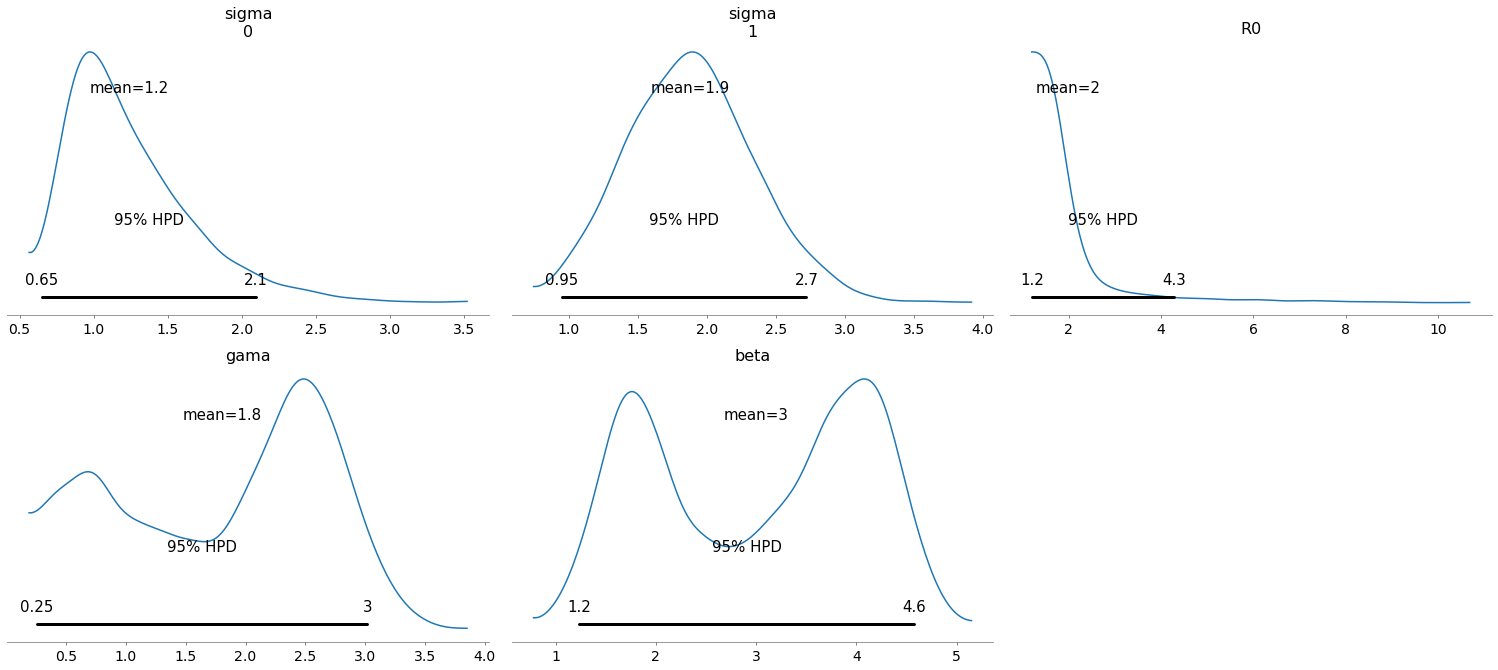

In [186]:
az.plot_posterior(data10, round_to=2, credible_interval=0.95)

So $R_0 = 2.0$ is a lower bound for the Coronavirus in Wuhan (= the $R_0$ of Ebola).

## Conclusion

In this notebook we extrapolated data from Wuhan, China, in order to compute the $R_0$ of Covid19. Since $R_0$ depends on social concentrations of the population that an epidemic targets, it is challenging to apply it to different populations. Nevertheless, an upper and lower bound on the epicenter of the epidemic provides us with an estimate of the contagiousness of the virus, which is higher than the flu or SARS. This data was available early on in the epidemic and this extrapolation could have easily been carried out by government agencies throughout, so that countries could have been better prepared for what they're going through now. 

Our estimate for $R_0$ would be in between the high and lower bounds, around 3.5 probably.

Now, countries are forced to enact tough social distancing measures in order to "*flatten the curve*". The need to drastically cut down $R_0$ is why China has, and Italy, Spain, and the US amonst other nations are undergoing such drastic social distancing measures. *Every person needs to cut down their social interactions*!

This science would not be possible without brave souls, like Li Wenliang, for whom saving his patients was more important than political propaganda. May he be a model for all. We owe him, and many other doctors, nurses, caretakers at the front line of the disease, so much. 

[Shi](https://www.scientificamerican.com/article/how-chinas-bat-woman-hunted-down-viruses-from-sars-to-the-new-coronavirus1/?utm_source=pocket-newtab) is quite a role model, too!

## References

- [The SIR Model for Spread of Disease - The Differential Equation Model, David Smith, Lang Moore, 2004](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model)

- [Appropriate Models for the Management of Infectious Diseases, Helen J Wearing, Pejman Rohani, Matt J Keeling, 2005](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1181873/)

- [Power-Law Models for Infectious Disease Spread, Sebastian Meyer and Leonhard Held, 2014](https://arxiv.org/pdf/1308.5115.pdf)

- [The Effect of Disease-Induced Mortality on Structural Network Properties, Lazaros K. Gallos, Nina H. Fefferman, 2015](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4552173/)

- [Fitting Epidemic Models to Data, James Holland Jones, 2018](http://web.stanford.edu/class/earthsys214/notes/fit.html)

- [Direct likelihood-based inference for discretely observed
stochastic compartmental models of infectious disease, Lam Si Tung Ho, Forrest W. Crawford, 
Marc A. Suchard, 2018](https://arxiv.org/pdf/1608.06769.pdf)

- [Modeling and inference for infectious disease dynamics: a likelihood-based approach, Carles Bretó, 2018](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5939946/)

- [Profile likelihood-based analyses of infectious disease models, 
Christian Tönsing, Jens Timmer, Clemens Kreutz, 2018](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5939946/), also [here](http://sysbio.uni-freiburg.de/ctoensing/paper/Toensing2017_ProfileLikelihoodInfectiousDiseaseModels.pdf)

- [Model selection and parameter estimation for dynamic epidemic models via iterated filtering: application to rotavirus in Germany, Theresa Stocks, Tom Britton, Michael Höhle, 2018](https://academic.oup.com/biostatistics/advance-article/doi/10.1093/biostatistics/kxy057/5108499)

- [Parameterizing Spatial Models of Infectious Disease Transmission that Incorporate Infection Time Uncertainty Using Sampling-Based Likelihood Approximations, Rajat Malik, Rob Deardon, Grace P. S. Kwong, 2018](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0146253)

- [A Survey of the Individual-Based Model applied in Biomedical and Epidemiology
Research, Erivelton G Nepomuceno1, Denise F Resende1, Márcio J Lacerda1, 2018](https://arxiv.org/ftp/arxiv/papers/1902/1902.02784.pdf)

- [Dimitri Pananos blog post on novel PyMC3 functionality](https://dpananos.github.io/posts/2019/08/blog-post-21)

- [Covid-19 — Navigating the Uncharted, Anthony S. Fauci, M.D., H. Clifford Lane, M.D., and Robert R. Redfield, M.D, 2020](https://www.nejm.org/doi/full/10.1056/NEJMe2002387)

## and remember..
Covid19 is not a *foreign* virus, as some.."*leaders*" have called it. It is *our* virus, and we will beat it *together*, one species, *one* human.

<br />
<center>
<img src="https://media0.giphy.com/media/cEFh8R2pNf0LC/giphy.gif" width=400 />
</center>